# Regression Methods

## by Farzad Minooei

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

## Read Data from File


In [2]:
data1 = pd.read_csv('CS_04.csv')

In [3]:
data1.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [4]:
data1.shape

(322, 21)

## Understanding Business Question

Sports Analytics

Hitters data set:

Major League Baseball Data from the 1986 and 1987 seasons

## Data Inspection 

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

### Varibles:

AtBat: Number of times at bat in 1986

Hits:  Number of hits in 1986

HmRun: Number of home runs in 1986

Runs:  Number of runs in 1986

RBI:   Number of runs batted in in 1986

Walks: Number of walks in 1986

Years: Number of years in the major leagues

CAtBat: Number of times at bat during his career

CHits:  Number of hits during his career

CHmRun: Number of home runs during his career

CRuns:  Number of runs during his career

CRBI:   Number of runs batted in during his career

CWalks: Number of walks during his career

League: A factor with levels A and N indicating player's league at the end of 1986

Division: A factor with levels E and W indicating player's division at the end of 1986

PutOuts:  Number of put outs in 1986

Assists:  Number of assists in 1986

Errors:   Number of errors in 1986

Salary:   1987 annual salary on opening day in thousands of dollars

NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987


In [6]:
data1.isna().sum()

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

In [7]:
#Dealing w/ MVs
#Analysis of MVs should be done
#Remove records with MVs
data2 = data1.dropna(subset = ['Salary'], inplace = False, axis = 0)

In [8]:
#Remove players' name
data2 = data2.iloc[:, 1:]

In [9]:
data2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [10]:
data2.shape

(263, 20)

In [11]:
data2.isna().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [12]:
data2.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


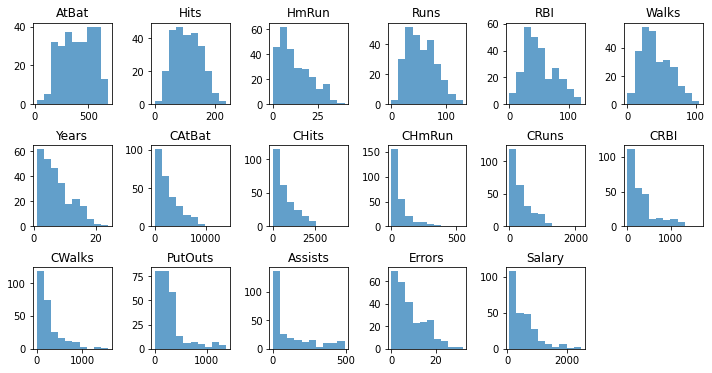

In [13]:
#Continuous variables distribution
var_ind = list(range(13)) + list(range(15, 19))
plot = plt.figure(figsize = (12, 6))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 18):
    a = plot.add_subplot(3, 6, i)
    a.hist(data2.iloc[: , var_ind[i - 1]], alpha = 0.7)
    a.title.set_text(data2.columns[var_ind[i - 1]])

Text(0.5, 1.0, 'Boxplot of Salary')

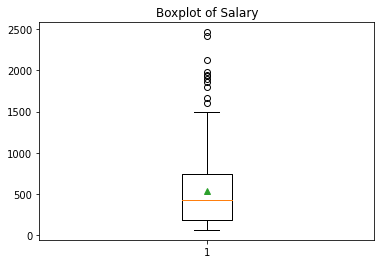

In [14]:
#Box plot of price
plt.boxplot(data2['Salary'], showmeans = True)
plt.title('Boxplot of Salary')

In [15]:
#Correlation Analysis
corr_table = round(data2.iloc[:, var_ind].corr(method = 'pearson'), 2)
corr_table

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.00,0.96,0.56,0.90,0.80,0.62,0.01,0.21,0.23,0.21,0.24,0.22,0.13,0.31,0.34,0.33,0.39
Hits,0.96,1.00,0.53,0.91,0.79,0.59,0.02,0.21,0.24,0.19,0.24,0.22,0.12,0.30,0.30,0.28,0.44
HmRun,0.56,0.53,1.00,0.63,0.85,0.44,0.11,0.22,0.22,0.49,0.26,0.35,0.23,0.25,-0.16,-0.01,0.34
Runs,0.90,0.91,0.63,1.00,0.78,0.70,-0.01,0.17,0.19,0.23,0.24,0.20,0.16,0.27,0.18,0.19,0.42
RBI,0.80,0.79,0.85,0.78,1.00,0.57,0.13,0.28,0.29,0.44,0.31,0.39,0.23,0.31,0.06,0.15,0.45
Walks,0.62,0.59,0.44,0.70,0.57,1.00,0.13,0.27,0.27,0.35,0.33,0.31,0.43,0.28,0.10,0.08,0.44
Years,0.01,0.02,0.11,-0.01,0.13,0.13,1.00,0.92,0.90,0.72,0.88,0.86,0.84,-0.02,-0.09,-0.16,0.40
CAtBat,0.21,0.21,0.22,0.17,0.28,0.27,0.92,1.00,1.00,0.80,0.98,0.95,0.91,0.05,-0.01,-0.07,0.53
CHits,0.23,0.24,0.22,0.19,0.29,0.27,0.90,1.00,1.00,0.79,0.98,0.95,0.89,0.07,-0.01,-0.07,0.55
CHmRun,0.21,0.19,0.49,0.23,0.44,0.35,0.72,0.80,0.79,1.00,0.83,0.93,0.81,0.09,-0.19,-0.17,0.52


<AxesSubplot:>

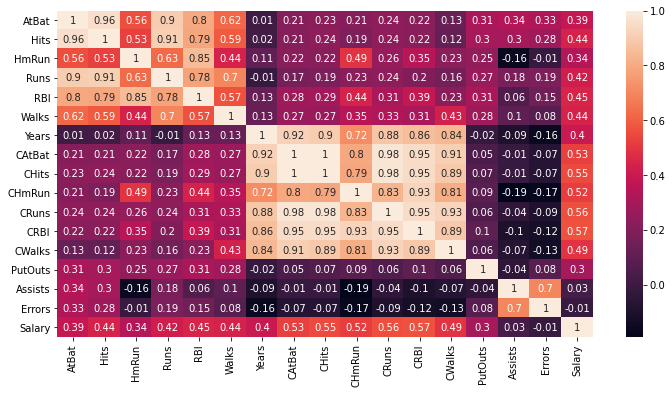

In [16]:
plt.figure(figsize = (12, 6))
sns.heatmap(corr_table, annot = True)

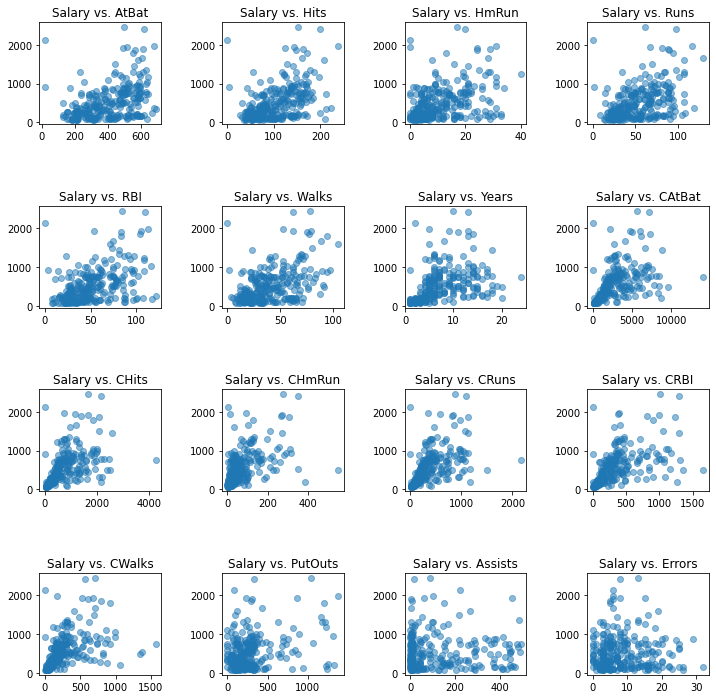

In [17]:
#Scatter Plot
var_ind = list(range(13)) + list(range(15, 18))
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.8, wspace = 0.5)
for i in range(1, 17):
    a = plot.add_subplot(4, 4, i)
    a.scatter(x = data2.iloc[: , var_ind[i - 1]], y = data2.iloc[: , 18], alpha = 0.5)
    a.title.set_text('Salary vs. ' + data2.columns[var_ind[i - 1]])

In [18]:
#Categorical variables
data2['League'].value_counts()

A    139
N    124
Name: League, dtype: int64

In [19]:
data2['Division'].value_counts()

W    134
E    129
Name: Division, dtype: int64

In [20]:
data2['NewLeague'].value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

## Data Preparation

### Divide Dataset into Train and Test

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data2, test_size = 0.2, random_state = 1234)

In [22]:
train.shape

(210, 20)

In [23]:
train.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,409.009524,109.923810,11.880952,55.871429,52.290476,41.838095,7.409524,2658.804762,721.333333,70.361905,360.742857,331.709524,259.609524,292.023810,111.880952,8.228571,562.288433
std,148.097730,46.149683,8.872306,25.833802,26.641091,21.846408,4.624038,2126.724958,596.666853,83.085605,307.176493,315.682880,251.547022,275.904453,143.031332,6.307521,466.852811
min,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,41.000000,9.000000,0.000000,6.000000,7.000000,4.000000,0.000000,0.000000,0.000000,68.000000
25%,283.000000,73.000000,5.000000,34.000000,30.000000,24.000000,4.000000,928.250000,230.250000,15.000000,116.250000,99.250000,76.500000,110.250000,7.000000,3.000000,210.000000
50%,417.000000,105.500000,9.000000,53.500000,47.000000,37.500000,6.000000,2035.500000,546.500000,40.000000,278.500000,251.500000,179.500000,226.000000,41.500000,6.000000,450.000000
75%,528.750000,144.750000,18.000000,76.000000,73.000000,57.000000,11.000000,3900.250000,1058.000000,92.750000,493.500000,419.750000,318.500000,318.500000,172.250000,12.750000,761.250000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,20.000000,9528.000000,2583.000000,548.000000,1509.000000,1659.000000,1380.000000,1377.000000,492.000000,29.000000,2460.000000


In [24]:
test.shape

(53, 20)

In [25]:
test.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,382.377358,99.528302,10.584906,50.283019,48.301887,38.245283,6.924528,2652.547170,725.566038,64.792453,363.113208,325.301887,262.867925,285.509434,146.018868,10.037736,431.470491
std,143.530113,40.146177,8.284448,24.056326,22.577716,21.160473,5.445001,2857.368387,828.292045,79.190947,416.452493,355.362414,311.416370,298.059211,151.253797,7.572629,368.025230
min,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,278.000000,70.000000,3.000000,32.000000,32.000000,22.000000,3.000000,682.000000,170.000000,16.000000,93.000000,80.000000,50.000000,117.000000,9.000000,4.000000,155.000000
50%,360.000000,103.000000,9.000000,48.000000,47.000000,34.000000,5.000000,1399.000000,357.000000,36.000000,168.000000,154.000000,128.000000,203.000000,80.000000,8.000000,297.500000
75%,511.000000,138.000000,17.000000,68.000000,60.000000,56.000000,10.000000,3828.000000,970.000000,90.000000,575.000000,458.000000,359.000000,325.000000,269.000000,16.000000,670.000000
max,584.000000,163.000000,33.000000,107.000000,104.000000,83.000000,24.000000,14053.000000,4256.000000,384.000000,2165.000000,1314.000000,1566.000000,1320.000000,465.000000,32.000000,1861.460000


## Building Prediction Model

### Model 1: Linear Regression

In [26]:
#Create dummies for columns with categorical variables
dummies = pd.get_dummies(train[['League', 'Division', 'NewLeague']])
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
98,0,1,0,1,0,1
206,0,1,0,1,0,1
54,1,0,1,0,1,0
177,1,0,1,0,1,0
27,0,1,0,1,0,1


In [27]:
#Define the feature set X 
X_ = train.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
X_train = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train = sm.add_constant(X_train) #adding a constant

#Define response variable
y_train = train['Salary']

In [28]:
X_train.head()

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
98,1.0,415,115,27,97,71,68,3,711,184,45,156,119,99,274,2,7,1,1,1
206,1.0,407,93,8,47,30,30,2,969,230,14,121,69,68,172,317,25,1,1,1
54,1.0,403,101,12,45,53,39,12,5150,1429,166,747,666,526,316,6,5,0,0,0
177,1.0,441,118,28,84,86,68,8,2723,750,126,433,420,309,190,2,2,0,0,0
27,1.0,474,129,10,50,56,40,10,2331,604,61,246,327,166,732,83,13,1,1,1


In [29]:
y_train.head()

98      300.0
206     150.0
54      675.0
177    1300.0
27      750.0
Name: Salary, dtype: float64

In [30]:
#Regression Model
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     12.28
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           4.97e-24
Time:                        18:55:54   Log-Likelihood:                -1504.0
No. Observations:                 210   AIC:                             3048.
Df Residuals:                     190   BIC:                             3115.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         184.2280    107.371      1.716      0.088     -27.565     396.021
AtBat          -1.7540      0.751     -2.336      0.021      -3.235      -0.273
Hits            6.5979      2.885      2.287      0.023       0.907      12.289
HmRun           7.3090      7.597      0.962      0.337      -7.675      22.293
Runs           -2.7338      3.582     -0.763      0.446      -9.799       4.332
RBI            -1.3503      3.172     -0.426      0.671      -7.608       4.908
Walks           5.4445      2.263      2.406      0.017       0.981       9.908
Years          -6.5675     14.116     -0.465      0.642     -34.412      21.277
CAtBat         -0.2467      0.172     -1.433      0.154      -0.586       0.093
CHits           0.5802      0.895      0.648      0.518      -1.185       2.346
CHmRun          0.0299      2.025      0.015      0.988      -3.965       4.025
CRuns           1.4403      0.886      1.625      0.106      -0.308       3.189
CRBI            0.3874      0.911      0.425      0.671      -1.409       2.184
CWalks         -0.6119      0.410     -1.491      0.137      -1.421       0.197
PutOuts         0.2961      0.094      3.141      0.002       0.110       0.482
Assists         0.2956      0.249      1.187      0.237      -0.195       0.787
Errors          0.7347      5.199      0.141      0.888      -9.520      10.990
League_N        5.0153     97.960      0.051      0.959    -188.214     198.245
Division_W   -134.5539     47.964     -2.805      0.006    -229.164     -39.944
NewLeague_N    36.0810     98.757      0.365      0.715    -158.719     230.881
==============================================================================
Omnibus:                       71.108   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              366.871
Skew:                           1.201   Prob(JB):                     2.16e-80
Kurtosis:                       9.013   Cond. No.                     2.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:ylabel='Probability'>

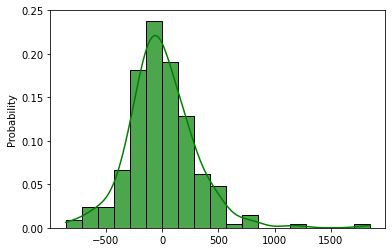

In [31]:
#Check Assumptions of Regression
#Normality of residuals

#Plot histogram of residuals
sns.histplot(lm.resid, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(lm.resid), max(lm.resid), 20))

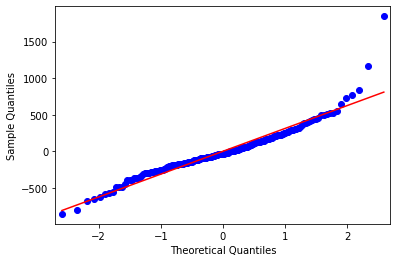

In [32]:
#QQ-plot
qqplot_lm = sm.qqplot(lm.resid, line = 's')
plt.show()

In [33]:
#Test for Skewness and Kurtosis
#Good for sample size > 25

#Jarque-Bera Test (Skewness = 0 ?)
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

#Omnibus K-squared normality test
#The Omnibus test combines the random variables for Skewness and Kurtosis into a single test statistic
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     12.28
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           4.97e-24
Time:                        18:59:36   Log-Likelihood:                -1504.0
No. Observations:                 210   AIC:                             3048.
Df Residuals:                     190   BIC:                             3115.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         184.2280    107.371      1.716      

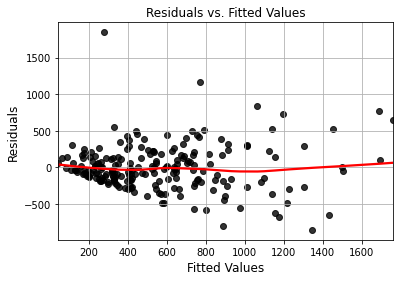

In [34]:
#Residuals vs. Fitted Values
sns.regplot(x = lm.fittedvalues, y = lm.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

In [35]:
#Check Cook's distance
sum(lm.get_influence().summary_frame().cooks_d > 1)

0

In [36]:
#Check Multicollinearity
#Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(X_train.iloc[:, 1:])
#If VIF > 10 then multicollinearity is high

,variables,VIF
0,AtBat,184.789083
1,Hits,228.168969
2,HmRun,24.624973
3,Runs,94.783224
4,RBI,67.555583
5,Walks,22.239021
6,Years,19.479370
7,CAtBat,661.537532
8,CHits,1367.185526
9,CHmRun,94.537823


Conclusion: severe violation of regression assumption
Bad model!


t-test results are not reliable for predictors selection.

In [37]:
#Check t-test results
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     12.28
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           4.97e-24
Time:                        19:04:04   Log-Likelihood:                -1504.0
No. Observations:                 210   AIC:                             3048.
Df Residuals:                     190   BIC:                             3115.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         184.2280    107.371      1.716      

In [38]:
#Regression Model based on t-test results
lm = sm.OLS(y_train, X_train[['const', 'AtBat', 'Hits','Walks','PutOuts', 'Division_W']]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     20.05
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           3.00e-16
Time:                        19:05:15   Log-Likelihood:                -1546.2
No. Observations:                 210   AIC:                             3104.
Df Residuals:                     204   BIC:                             3124.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        174.4321     87.896      1.985      0.049       1.131     347.733
AtBat         -1.6859      0.702     -2.400      0.017      -3.071      -0.301
Hits           7.3574      2.169      3.391      0.001       3.080      11.635
Walks          6.4162      1.569      4.089      0.000       3.322       9.510
PutOuts        0.2851      0.104      2.751      0.006       0.081       0.489
Division_W  -158.5226     54.000     -2.936      0.004    -264.993     -52.052
==============================================================================
Omnibus:                       61.603   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.411
Skew:                           1.249   Prob(JB):                     3.64e-38
Kurtosis:                       6.670   Cond. No.                     1.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 1: Prediction on Test dataset

In [39]:
test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
295,19,4,1,2,3,1,1,19,4,1,2,3,1,N,W,692,70,8,920.0,A
132,278,70,7,22,37,18,18,7186,2081,190,935,1088,643,A,W,0,0,0,325.0,A
137,343,103,6,48,36,40,15,4338,1193,70,581,421,325,A,E,211,56,13,430.0,A
268,549,149,7,73,47,42,1,549,149,7,73,47,42,N,W,255,450,17,140.0,N
239,309,72,0,33,31,26,5,354,82,0,41,32,26,N,E,117,269,12,130.0,N


In [40]:
#Create dummies for columns with categorical variables
dummies = pd.get_dummies(test[['League', 'Division', 'NewLeague']])

#Define the feature set X 
X_ = test.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
X_test = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_test = sm.add_constant(X_test) # adding a constant

#Define response variable
y_test = test['Salary']

In [41]:
X_test.head()

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
295,1.0,19,4,1,2,3,1,1,19,4,1,2,3,1,692,70,8,1,1,0
132,1.0,278,70,7,22,37,18,18,7186,2081,190,935,1088,643,0,0,0,0,1,0
137,1.0,343,103,6,48,36,40,15,4338,1193,70,581,421,325,211,56,13,0,0,0
268,1.0,549,149,7,73,47,42,1,549,149,7,73,47,42,255,450,17,1,1,1
239,1.0,309,72,0,33,31,26,5,354,82,0,41,32,26,117,269,12,1,0,1


In [42]:
X_test.shape

(53, 20)

In [43]:
y_test.head()

295    920.0
132    325.0
137    430.0
268    140.0
239    130.0
Name: Salary, dtype: float64

In [44]:
pred_lm = lm.predict(X_test[['const', 'AtBat', 'Hits','Walks','PutOuts', 'Division_W']])

In [45]:
#Absolute error
abs_err_lm = abs(y_test - pred_lm)

In [46]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.DataFrame({'Mean of AbsErrors':    abs_err_lm.mean(),
                           'Median of AbsErrors' : abs_err_lm.median(),
                           'SD of AbsErrors' :     abs_err_lm.std(),
                           'IQR of AbsErrors':     iqr(abs_err_lm),
                           'Min of AbsErrors':     abs_err_lm.min(),
                           'Max of AbsErrors':     abs_err_lm.max()}, index = ['LM'])
model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257


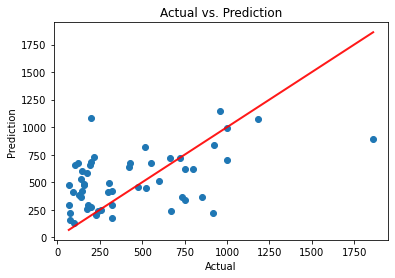

In [47]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_lm)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')

### Box-Cox Transformation

In [48]:
#Box-Cox Transformation
from scipy.stats import boxcox
box_results = boxcox(y_train, alpha = 0.05)

In [49]:
box_results

(array([ 8.68767642,  7.23164837, 10.57834815, 12.26939869, 10.83994871,
         6.62404411,  7.71258662,  8.68767642, 10.83994871,  8.96581785,
        11.22963399, 12.37152681,  9.42809521, 11.68471715, 11.22963399,
        10.2903865 , 11.07990572, 10.01452882,  6.24460125,  9.33424139,
        12.18523005,  8.49713804,  9.18694201,  9.85379764, 12.05455555,
         6.19217269,  8.29104472,  8.97678487,  9.12564319,  8.58783864,
        10.69755487, 12.26939869,  9.33424139, 13.38038527,  6.62404411,
        14.01171784, 10.66821468, 10.38965872, 11.15571849, 11.30175192,
         9.60648041,  7.84493411,  6.44250966,  7.42366699, 10.08065305,
         8.4167188 ,  7.92100039, 12.83795386,  5.73192967, 10.66821468,
         9.99213228, 11.57398419, 10.34045899, 10.91673547, 12.26939869,
         6.44250966, 11.44095555,  9.60648041, 13.35909851, 11.22963399,
         9.60648041, 13.4314587 ,  9.03092529,  9.7940383 , 10.92754387,
        10.79796189,  6.24460125, 10.44759156, 11.8

In [50]:
#log transformation
logy_train = np.log(y_train)
logy_train

98     5.703782
206    5.010635
54     6.514713
177    7.170120
27     6.620073
         ...   
183    4.828314
192    6.263398
256    5.991465
72     6.745236
263    6.606650
Name: Salary, Length: 210, dtype: float64

<AxesSubplot:xlabel='Salary', ylabel='Probability'>

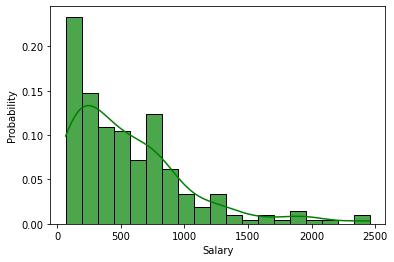

In [51]:
#Histogram of Salary
sns.histplot(y_train, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(y_train), max(y_train), 20))

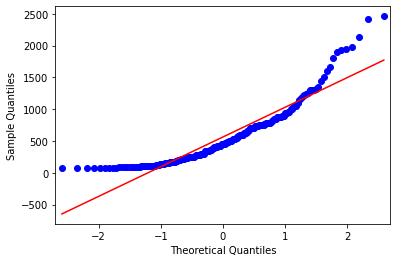

In [52]:
#QQ-plot
qqplot_lm_bc = sm.qqplot(y_train, line = 's')
plt.show()

<AxesSubplot:xlabel='Salary', ylabel='Probability'>

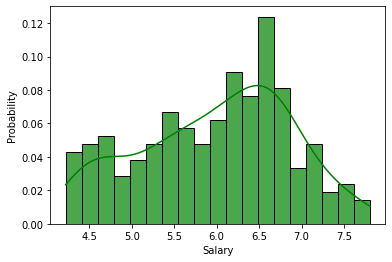

In [53]:
#Histogram of Log Salary
sns.histplot(logy_train, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(logy_train), max(logy_train), 20))

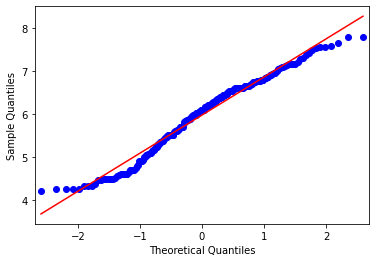

In [54]:
#QQ-plot
qqplot_lm_bc = sm.qqplot(logy_train, line = 's')
plt.show()

### Model 2: Linear Regression Using the Best Subset Selection

Algorithm:

1- Let M0 denote the null model , which contains no predictors. 

2- For k = 1, 2,...p:

(a) Fit all Cr(p, k) models that contain exactly k predictors.

(b) Pick the best among these models, and call it Mk.
       The best is defined as having the largest R-squared.
       
3- Select a single best model from among M0, ..., Mp

   using cross-validated prediction error, AIC, BIC, or adjusted R-squared

In [55]:
X_train.head()

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
98,1.0,415,115,27,97,71,68,3,711,184,45,156,119,99,274,2,7,1,1,1
206,1.0,407,93,8,47,30,30,2,969,230,14,121,69,68,172,317,25,1,1,1
54,1.0,403,101,12,45,53,39,12,5150,1429,166,747,666,526,316,6,5,0,0,0
177,1.0,441,118,28,84,86,68,8,2723,750,126,433,420,309,190,2,2,0,0,0
27,1.0,474,129,10,50,56,40,10,2331,604,61,246,327,166,732,83,13,1,1,1


In [56]:
#Define function to fit linear regression
def fit_lm(feature_set):
    reg_model = sm.OLS(logy_train, X_train[['const'] + list(feature_set)]).fit()
    return {'model': reg_model, 'RSquared': reg_model.rsquared}

In [57]:
#Get All Combinations with 3 Variables
#Cr(19, 3)
import itertools
list(itertools.combinations(X_train.iloc[:, 1:].columns, 3))

[('AtBat', 'Hits', 'HmRun'),
 ('AtBat', 'Hits', 'Runs'),
 ('AtBat', 'Hits', 'RBI'),
 ('AtBat', 'Hits', 'Walks'),
 ('AtBat', 'Hits', 'Years'),
 ('AtBat', 'Hits', 'CAtBat'),
 ('AtBat', 'Hits', 'CHits'),
 ('AtBat', 'Hits', 'CHmRun'),
 ('AtBat', 'Hits', 'CRuns'),
 ('AtBat', 'Hits', 'CRBI'),
 ('AtBat', 'Hits', 'CWalks'),
 ('AtBat', 'Hits', 'PutOuts'),
 ('AtBat', 'Hits', 'Assists'),
 ('AtBat', 'Hits', 'Errors'),
 ('AtBat', 'Hits', 'League_N'),
 ('AtBat', 'Hits', 'Division_W'),
 ('AtBat', 'Hits', 'NewLeague_N'),
 ('AtBat', 'HmRun', 'Runs'),
 ('AtBat', 'HmRun', 'RBI'),
 ('AtBat', 'HmRun', 'Walks'),
 ('AtBat', 'HmRun', 'Years'),
 ('AtBat', 'HmRun', 'CAtBat'),
 ('AtBat', 'HmRun', 'CHits'),
 ('AtBat', 'HmRun', 'CHmRun'),
 ('AtBat', 'HmRun', 'CRuns'),
 ('AtBat', 'HmRun', 'CRBI'),
 ('AtBat', 'HmRun', 'CWalks'),
 ('AtBat', 'HmRun', 'PutOuts'),
 ('AtBat', 'HmRun', 'Assists'),
 ('AtBat', 'HmRun', 'Errors'),
 ('AtBat', 'HmRun', 'League_N'),
 ('AtBat', 'HmRun', 'Division_W'),
 ('AtBat', 'HmRun', 'NewLea

In [58]:
#Cr(19, 3)
len(list(itertools.combinations(X_train.iloc[:, 1:].columns, 3)))

969

In [59]:
def bestsubset_func(k):      
    res = []    
    #Looping over all possible combinations
    for features in itertools.combinations(X_train.iloc[:, 1:].columns, k):
        res.append(fit_lm(features))
    
    models = pd.DataFrame(res)
    
    #Choose the model with the Highest RSquared
    best_model = models.iloc[models['RSquared'].argmax()] 
         #Note: numpy.argmax() returns indices of the maximum values along with the specified axis.
    
    #Return the best model
    return best_model

In [60]:
import time #to measure the processing time
models_bestsub = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
for i in range(1, len(X_train.iloc[:, 1:].columns) + 1):
    models_bestsub.loc[i] = bestsubset_func(i)
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  1124.237973690033 seconds


In [61]:
models_bestsub

,RSquared,model
1,0.425432,<statsmodels.regression.linear_model.Regressio...
2,0.512932,<statsmodels.regression.linear_model.Regressio...
3,0.525508,<statsmodels.regression.linear_model.Regressio...
4,0.534908,<statsmodels.regression.linear_model.Regressio...
5,0.542770,<statsmodels.regression.linear_model.Regressio...
6,0.547237,<statsmodels.regression.linear_model.Regressio...
7,0.551506,<statsmodels.regression.linear_model.Regressio...
8,0.557208,<statsmodels.regression.linear_model.Regressio...
9,0.561140,<statsmodels.regression.linear_model.Regressio...
10,0.563411,<statsmodels.regression.linear_model.Regressio...


In [62]:
print(models_bestsub.loc[4, 'model'].summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     58.94
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           4.67e-33
Time:                        22:50:47   Log-Likelihood:                -192.52
No. Observations:                 210   AIC:                             395.0
Df Residuals:                     205   BIC:                             411.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6128      0.159     29.014      0.0

In [63]:
#Adj. RSquared
models_bestsub_adjrs = models_bestsub.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_bestsub_adjrs

1     0.422670
2     0.508226
3     0.518598
4     0.525833
5     0.531564
6     0.533855
7     0.535964
8     0.539585
9     0.541391
10    0.541472
11    0.541688
12    0.540516
13    0.539044
14    0.537243
15    0.535404
16    0.533531
17    0.531110
18    0.528737
19    0.526265
dtype: float64

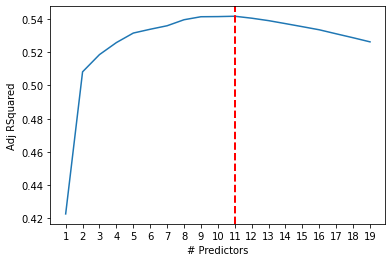

In [64]:
#Adj. RSquared Plot
plt.plot(models_bestsub_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj RSquared')
plt.axvline(models_bestsub_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

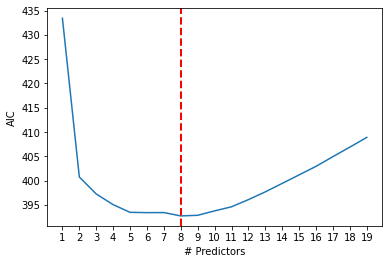

In [65]:
#AIC Plot
models_bestsub_aic = models_bestsub.apply(lambda row: row[1].aic, axis = 1)
plt.plot(models_bestsub_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_bestsub_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

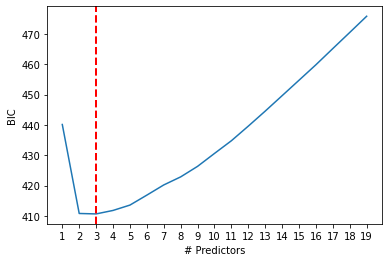

In [66]:
#BIC Plot
models_bestsub_bic = models_bestsub.apply(lambda row: row[1].bic, axis = 1)
plt.plot(models_bestsub_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_bestsub_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

In [67]:
#Model with 11 Variables
models_bestsub.loc[11, 'model'].params

const         4.599892
AtBat        -0.002436
Hits          0.010633
HmRun         0.009030
Walks         0.008183
Years         0.057739
CRuns         0.001434
CWalks       -0.001006
PutOuts       0.000257
Assists       0.000365
League_N      0.125903
Division_W   -0.190390
dtype: float64

In [68]:
#Model with 11 Variables: Variable Names
models_bestsub.loc[11, 'model'].model.exog_names

['const',
 'AtBat',
 'Hits',
 'HmRun',
 'Walks',
 'Years',
 'CRuns',
 'CWalks',
 'PutOuts',
 'Assists',
 'League_N',
 'Division_W']

#### Model 2: Prediction on Test Dataset

In [69]:
X_test[models_bestsub.loc[11, 'model'].model.exog_names].head()

,const,AtBat,Hits,HmRun,Walks,Years,CRuns,CWalks,PutOuts,Assists,League_N,Division_W
295,1.0,19,4,1,1,1,2,1,692,70,1,1
132,1.0,278,70,7,18,18,935,643,0,0,0,1
137,1.0,343,103,6,40,15,581,325,211,56,0,0
268,1.0,549,149,7,42,1,73,42,255,450,1,1
239,1.0,309,72,0,26,5,41,26,117,269,1,0


In [70]:
pred_bestsub = models_bestsub.loc[11, 'model'].predict(X_test[models_bestsub.loc[11, 'model'].model.exog_names])
pred_bestsub.head()

295    4.811669
132    6.420305
137    6.687956
268    5.539181
239    5.400993
dtype: float64

In [71]:
pred_bestsub = np.exp(pred_bestsub)
pred_bestsub.head()

295    122.936656
132    614.190643
137    802.680216
268    254.469448
239    221.626363
dtype: float64

In [72]:
y_test.head()

295    920.0
132    325.0
137    430.0
268    140.0
239    130.0
Name: Salary, dtype: float64

In [73]:
#Absolute error
abs_err_bestsub = abs(y_test - pred_bestsub)

In [74]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_bestsub.mean(),
                                             'Median of AbsErrors' : abs_err_bestsub.median(),
                                             'SD of AbsErrors' :     abs_err_bestsub.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_bestsub),
                                             'Min of AbsErrors':     abs_err_bestsub.min(),
                                             'Max of AbsErrors':     abs_err_bestsub.max()}, index = ['BestSubset']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276


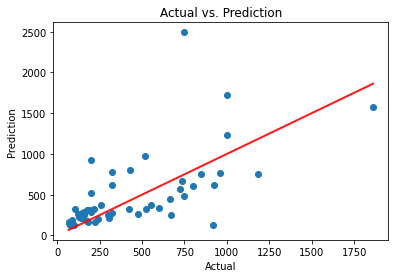

In [75]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_bestsub)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

### Model 3: Forward and Backward Stepwise Selection

Forward Stepwise Selection Algorithm:

1- Let M0 denote the null model , which contains no predictors. 

2- For k = 0, 2,...p - 1:

(a) Consider all C(p, k) models that augment the predictors in Mk 
       with one additional predictor.

(b) Pick the best among these models, and call it Mk+1.
       The best is defined as having the largest R-squared.
       
3- Select a single best model from among M0, ..., Mp
   using cross-validated prediction error, Cp, BIC, or adjusted R


In [76]:
def forward_func(features):
    res = []
    # Pull out features still needed to process
    remaining_features = [_ for _ in X_train.iloc[:, 1:].columns if _ not in features]
          
    for f in remaining_features:
        res.append(fit_lm(features + [f]))
   
    models = pd.DataFrame(res)
    
    #Choose the model with the Highest RSquared
    best_model = models.iloc[models['RSquared'].argmax()] 
    
    #Return the best model
    return best_model

In [77]:
#Forward Selection Implementation
import time #to measure the processing time
models_fw = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
features = []
for i in range(1, len(X_train.iloc[:, 1:].columns) + 1):
    models_fw.loc[i] = forward_func(features)
    features = models_fw.loc[i, 'model'].model.exog_names[1:]
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  0.4877464771270752 seconds


In [78]:
models_fw

,RSquared,model
1,0.425432,<statsmodels.regression.linear_model.Regressio...
2,0.512932,<statsmodels.regression.linear_model.Regressio...
3,0.525508,<statsmodels.regression.linear_model.Regressio...
4,0.534138,<statsmodels.regression.linear_model.Regressio...
5,0.542770,<statsmodels.regression.linear_model.Regressio...
6,0.547122,<statsmodels.regression.linear_model.Regressio...
7,0.550685,<statsmodels.regression.linear_model.Regressio...
8,0.554685,<statsmodels.regression.linear_model.Regressio...
9,0.557618,<statsmodels.regression.linear_model.Regressio...
10,0.560101,<statsmodels.regression.linear_model.Regressio...


In [79]:
print(models_fw.loc[4, 'model'].summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     58.76
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           5.53e-33
Time:                        22:52:07   Log-Likelihood:                -192.69
No. Observations:                 210   AIC:                             395.4
Df Residuals:                     205   BIC:                             412.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7982      0.126     37.978      0.0

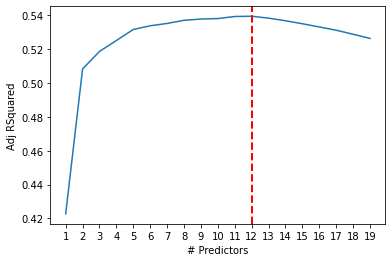

In [80]:
#Adj. RSquared
models_fw_adjrs = models_fw.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_fw_adjrs
#Adj. RSquared Plot
plt.plot(models_fw_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj RSquared')
plt.axvline(models_fw_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

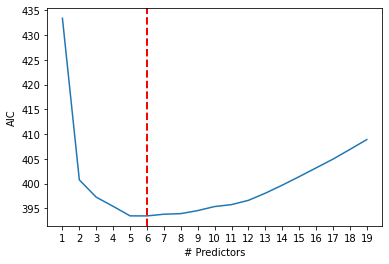

In [81]:
#AIC Plot
models_fw_aic = models_fw.apply(lambda row: row[1].aic, axis = 1)
plt.plot(models_fw_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_fw_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

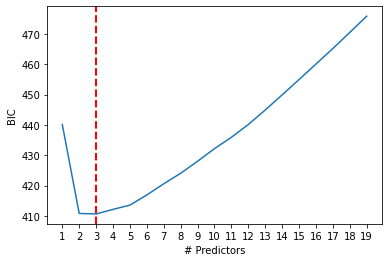

In [82]:
#BIC Plot
models_fw_bic = models_fw.apply(lambda row: row[1].bic, axis = 1)
plt.plot(models_fw_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_fw_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

In [83]:
#Model with 12 Variables
models_fw.loc[12, 'model'].params

const         4.600357
CHits         0.000005
Hits          0.010624
Division_W   -0.190520
Walks         0.008189
Years         0.057619
League_N      0.125747
AtBat        -0.002434
PutOuts       0.000256
HmRun         0.009038
CWalks       -0.001005
CRuns         0.001425
Assists       0.000365
dtype: float64

Backward Selection Algorithm:

1- Let Mp denote the full model , which contains all predictors. 

2- For k = p, p - 1,..., 1:

(a) Consider all k models that contain all but one of the predictors
       in  Mk, for a total of k ??? 1 predictors.

(b) Pick the best among these models, and call it Mk-1.
       The best is defined as having the largest R-squared.

3- Select a single best model from among M0, ..., Mp
   using cross-validated prediction error, Cp, BIC, or adjusted R

In [84]:
def backward_func(features):
    res = []
    for features in itertools.combinations(features, len(features) - 1):
        res.append(fit_lm(features))
    
    models = pd.DataFrame(res)
    
    #Choose the model with the Highest RSquared
    best_model = models.iloc[models['RSquared'].argmax()] 
          
    #Return the best model
    return best_model

In [89]:
#Backward Selection Implementation
models_bw = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
features = X_train.columns
while(len(features) > 1):  
    models_bw.loc[len(features) - 1] = backward_func(features)
    features = models_bw.loc[len(features) - 1]["model"].model.exog_names[1:]
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  0.5774803161621094 seconds


In [90]:
models_bw

,RSquared,model
19,0.569332,<statsmodels.regression.linear_model.Regressio...
18,0.569325,<statsmodels.regression.linear_model.Regressio...
17,0.569249,<statsmodels.regression.linear_model.Regressio...
16,0.569241,<statsmodels.regression.linear_model.Regressio...
15,0.568749,<statsmodels.regression.linear_model.Regressio...
14,0.568241,<statsmodels.regression.linear_model.Regressio...
13,0.567716,<statsmodels.regression.linear_model.Regressio...
12,0.566898,<statsmodels.regression.linear_model.Regressio...
11,0.565810,<statsmodels.regression.linear_model.Regressio...
10,0.563411,<statsmodels.regression.linear_model.Regressio...


In [91]:
print(models_bw.loc[4, 'model'].summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     58.94
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           4.67e-33
Time:                        22:53:43   Log-Likelihood:                -192.52
No. Observations:                 210   AIC:                             395.0
Df Residuals:                     205   BIC:                             411.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6128      0.159     29.014      0.0

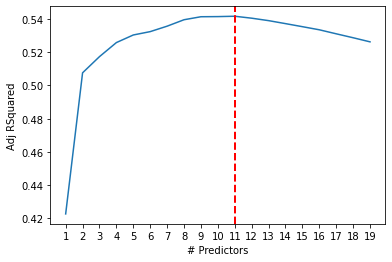

In [92]:
#Adj. RSquared
models_bw_adjrs = models_bw.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_bw_adjrs = models_bw_adjrs.sort_index()
#Adj. RSquared Plot
plt.plot(models_bw_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj RSquared')
plt.axvline(models_bw_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

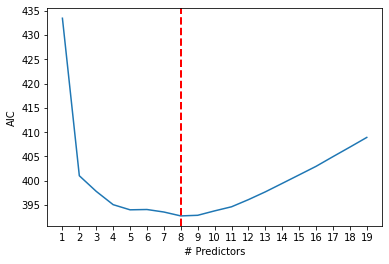

In [93]:
#AIC Plot
models_bw_aic = models_bw.apply(lambda row: row[1].aic, axis = 1)
models_bw_aic = models_bw_aic.sort_index()
plt.plot(models_bw_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_bw_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

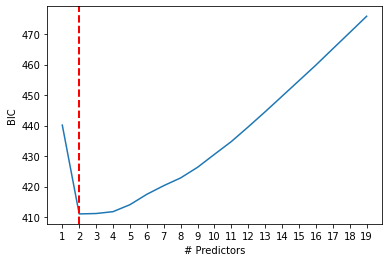

In [94]:
#BIC Plot
models_bw_bic = models_bw.apply(lambda row: row[1].bic, axis = 1)
models_bw_bic = models_bw_bic.sort_index()
plt.plot(models_bw_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_bw_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

### Model 3: Prediction on Test Dataset

In [95]:
#Forward Selection Model with 12 Variables
models_fw.loc[12, 'model'].params

const         4.600357
CHits         0.000005
Hits          0.010624
Division_W   -0.190520
Walks         0.008189
Years         0.057619
League_N      0.125747
AtBat        -0.002434
PutOuts       0.000256
HmRun         0.009038
CWalks       -0.001005
CRuns         0.001425
Assists       0.000365
dtype: float64

In [96]:
pred_fw = models_fw.loc[12, 'model'].predict(X_test[models_fw.loc[12, 'model'].model.exog_names])
pred_fw = np.exp(pred_fw)
pred_fw.head()

295    122.907000
132    614.793307
137    802.378147
268    254.415807
239    221.544790
dtype: float64

In [97]:
#Absolute error
abs_err_fw = abs(y_test - pred_fw)

In [98]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_fw.mean(),
                                             'Median of AbsErrors' : abs_err_fw.median(),
                                             'SD of AbsErrors' :     abs_err_fw.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_fw),
                                             'Min of AbsErrors':     abs_err_fw.min(),
                                             'Max of AbsErrors':     abs_err_fw.max()}, index = ['Forward Stepwise']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787


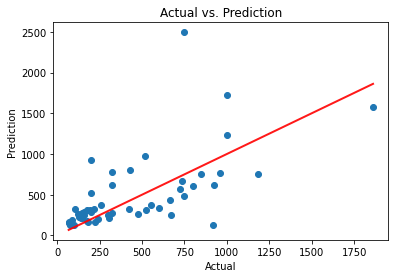

In [99]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_fw)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

Inspect different models (Do it yourself)

### Model 4: Using K-fold Cross-Validation Approach

In [100]:
k = 10
np.random.seed(123)
folds = np.random.randint(low = 1, high = k + 1, size = X_train.shape[0])

In [101]:
folds

array([ 3,  3,  7,  2,  4, 10,  7,  2,  1,  2, 10,  1,  1, 10,  4,  5,  1,
        1,  5,  2,  8,  4,  3,  5,  8,  3,  5,  9,  1,  8, 10,  4,  5,  7,
        2,  6,  7,  3,  2,  9,  4,  6,  1,  3,  7,  3,  5,  5,  7,  4,  1,
        7,  5,  8,  7,  8,  2,  6,  8, 10,  3,  5,  9,  2,  3,  2,  2,  4,
        6, 10,  1,  9,  2,  7,  4,  4,  6, 10,  8, 10,  3,  4,  4,  4,  9,
        7, 10,  8,  7,  4, 10,  7,  7,  7,  2,  4,  5,  4,  2,  1,  6,  9,
        7,  9, 10,  2,  1,  4,  2,  4,  5,  8,  7,  2,  5,  4,  4,  8,  7,
        9,  7,  5,  5,  8,  1,  1, 10,  9,  9,  5,  9,  7,  2,  7,  9,  8,
       10,  2,  8,  2,  8, 10,  9,  8,  2,  4,  2,  9,  8,  6,  2,  3,  6,
        3,  3, 10,  4,  3,  7,  8, 10,  2,  4,  9,  4,  8, 10, 10,  4,  4,
        6,  7,  1,  9,  8,  8,  5,  5,  6,  1,  9, 10,  3,  6,  2,  6, 10,
        3,  5,  4,  1,  4,  8,  8,  3,  6,  2,  8,  6, 10,  2,  3,  9,  6,
        1, 10,  4,  4,  4,  2])

In [102]:
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 20))

In [103]:
cv_errors

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#Forward Stepwise Regression Results
models_fw

,RSquared,model
1,0.425432,<statsmodels.regression.linear_model.Regressio...
2,0.512932,<statsmodels.regression.linear_model.Regressio...
3,0.525508,<statsmodels.regression.linear_model.Regressio...
4,0.534138,<statsmodels.regression.linear_model.Regressio...
5,0.542770,<statsmodels.regression.linear_model.Regressio...
6,0.547122,<statsmodels.regression.linear_model.Regressio...
7,0.550685,<statsmodels.regression.linear_model.Regressio...
8,0.554685,<statsmodels.regression.linear_model.Regressio...
9,0.557618,<statsmodels.regression.linear_model.Regressio...
10,0.560101,<statsmodels.regression.linear_model.Regressio...


In [105]:
#Forward Stepwise Regression using K-fold Cross Validation
for i in range(1, models_fw.shape[0] + 1):
    for j in range(1, k + 1):
        reg_model = sm.OLS(logy_train[folds != j], X_train.loc[folds != j, models_fw.loc[i, 'model'].model.exog_names]).fit()
        pred = reg_model.predict(X_train.loc[folds == j, models_fw.loc[i, 'model'].model.exog_names])
        cv_errors.iloc[j - 1, i - 1] = ((logy_train[folds == j] - pred) ** 2).mean()

In [106]:
cv_errors

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,0.385778,0.339508,0.338599,0.334091,0.341269,0.320914,0.321674,0.344923,0.340978,0.338953,0.341332,0.340178,0.353701,0.349647,0.347048,0.350344,0.366441,0.366923,0.366921
2,0.618394,0.552744,0.51593,0.512918,0.507632,0.523144,0.530161,0.521972,0.51781,0.510128,0.528101,0.540469,0.545626,0.579453,0.609889,0.625634,0.623402,0.633717,0.633984
3,0.359903,0.308089,0.284955,0.262682,0.25328,0.249789,0.232925,0.268011,0.267101,0.323239,0.308574,0.310015,0.308437,0.30411,0.324179,0.321527,0.342124,0.341638,0.343261
4,0.535129,0.334172,0.34674,0.334508,0.311085,0.297051,0.316048,0.303853,0.301524,0.297348,0.287929,0.282067,0.28255,0.281511,0.29931,0.307498,0.313555,0.321293,0.331839
5,0.454441,0.234904,0.29582,0.293279,0.292527,0.32454,0.306409,0.287988,0.277459,0.279936,0.270617,0.261819,0.268101,0.267356,0.266207,0.263684,0.261796,0.261351,0.263266
6,0.276342,0.217736,0.199292,0.191739,0.168811,0.188772,0.21327,0.231859,0.229362,0.240496,0.241633,0.253171,0.256214,0.250754,0.259643,0.261615,0.26016,0.260017,0.259983
7,0.324075,0.344247,0.3346,0.310509,0.308438,0.300019,0.294508,0.278512,0.302981,0.300067,0.292918,0.285696,0.282054,0.279461,0.278032,0.27609,0.274146,0.27583,0.282746
8,0.645333,0.831073,0.793251,0.800047,0.820727,0.815866,0.803494,0.802336,0.801409,0.799248,0.786075,0.77739,0.775325,0.797919,0.81929,0.826279,0.830948,0.834031,0.838582
9,0.42929,0.271813,0.262909,0.252491,0.23023,0.245847,0.236647,0.258335,0.269157,0.274181,0.317065,0.318855,0.314986,0.315036,0.321553,0.319417,0.318438,0.321822,0.323041
10,0.39302,0.395168,0.391195,0.412247,0.40806,0.394399,0.415009,0.407971,0.427193,0.441239,0.45369,0.462029,0.457915,0.455285,0.453532,0.476819,0.478343,0.478605,0.485421


In [107]:
mean_cv_erros = cv_errors.mean(axis = 0)
mean_cv_erros 

1     0.442171
2     0.382945
3     0.376329
4     0.370451
5     0.364206
6     0.366034
7     0.367014
8     0.370576
9     0.373497
10    0.380483
11    0.382793
12    0.383169
13    0.384491
14    0.388053
15    0.397868
16    0.402891
17    0.406935
18    0.409523
19    0.412904
dtype: float64

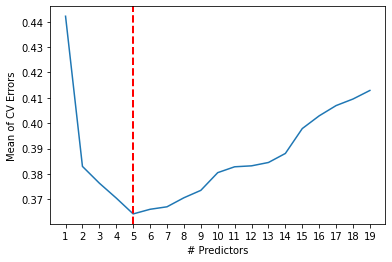

In [108]:
#Mean of CV Errors Plot
plt.plot(mean_cv_erros)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Mean of CV Errors')
plt.axvline(mean_cv_erros.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

### Model 4: Prediction on Test Dataset

In [109]:
#Forward Selection Model with 5 Variables
models_fw.loc[5, 'model'].params

const         4.575593
CHits         0.000466
Hits          0.005712
Division_W   -0.199733
Walks         0.005095
Years         0.044819
dtype: float64

In [110]:
pred_fw_cv = models_fw.loc[5, 'model'].predict(X_test[models_fw.loc[5, 'model'].model.exog_names])
pred_fw_cv = np.exp(pred_fw_cv)
pred_fw_cv.head()

295     85.668593
132    767.980860
137    732.069863
268    258.573612
239    217.376163
dtype: float64

In [111]:
#Absolute error
abs_err_fw_cv = abs(y_test - pred_fw_cv)

In [112]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_fw_cv.mean(),
                                             'Median of AbsErrors' : abs_err_fw_cv.median(),
                                             'SD of AbsErrors' :     abs_err_fw_cv.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_fw_cv),
                                             'Min of AbsErrors':     abs_err_fw_cv.min(),
                                             'Max of AbsErrors':     abs_err_fw_cv.max()}, index = ['Forward Stepwise CV']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170


### Model 5: Ridge Regression

Ridge Regression:

The goal is to optimize:

SSE + lambda * Sum( beta_i ^ 2)

lambda => 0,  a tuning parameter

In [113]:
lambda_grid = 10 ** np.linspace(5, -2, 100)
lambda_grid

array([1.00000000e+05, 8.49753436e+04, 7.22080902e+04, 6.13590727e+04,
       5.21400829e+04, 4.43062146e+04, 3.76493581e+04, 3.19926714e+04,
       2.71858824e+04, 2.31012970e+04, 1.96304065e+04, 1.66810054e+04,
       1.41747416e+04, 1.20450354e+04, 1.02353102e+04, 8.69749003e+03,
       7.39072203e+03, 6.28029144e+03, 5.33669923e+03, 4.53487851e+03,
       3.85352859e+03, 3.27454916e+03, 2.78255940e+03, 2.36448941e+03,
       2.00923300e+03, 1.70735265e+03, 1.45082878e+03, 1.23284674e+03,
       1.04761575e+03, 8.90215085e+02, 7.56463328e+02, 6.42807312e+02,
       5.46227722e+02, 4.64158883e+02, 3.94420606e+02, 3.35160265e+02,
       2.84803587e+02, 2.42012826e+02, 2.05651231e+02, 1.74752840e+02,
       1.48496826e+02, 1.26185688e+02, 1.07226722e+02, 9.11162756e+01,
       7.74263683e+01, 6.57933225e+01, 5.59081018e+01, 4.75081016e+01,
       4.03701726e+01, 3.43046929e+01, 2.91505306e+01, 2.47707636e+01,
       2.10490414e+01, 1.78864953e+01, 1.51991108e+01, 1.29154967e+01,
      

In [114]:
from sklearn.linear_model import Ridge, RidgeCV
ridgereg = Ridge(normalize = True)

models = pd.DataFrame(index = lambda_grid, columns = X_train.columns)
coefs = []
for i in lambda_grid:
    ridgereg.set_params(alpha = i)
    ridgereg.fit(X_train, logy_train)
    models.loc[i, :] = ridgereg.coef_
models.shape    

(100, 20)

In [115]:
models.head()

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
100000.000000,0,2.65633e-08,9.04186e-08,3.73721e-07,1.53453e-07,1.55801e-07,1.753e-07,1.03546e-06,2.67027e-09,9.72364e-09,5.72727e-08,1.88865e-08,1.73354e-08,2.00666e-08,7.15107e-09,6.2102e-09,3.64508e-08,8.00525e-09,-3.26221e-06,-2.25202e-07
84975.343591,0,3.12596e-08,1.06404e-07,4.39792e-07,1.80584e-07,1.83346e-07,2.06293e-07,1.21852e-06,3.14237e-09,1.14427e-08,6.73982e-08,2.22256e-08,2.04002e-08,2.36142e-08,8.41537e-09,7.30819e-09,4.28953e-08,9.44261e-09,-3.83898e-06,-2.64999e-07
72208.090184,0,3.67861e-08,1.25216e-07,5.17544e-07,2.1251e-07,2.1576e-07,2.42764e-07,1.43395e-06,3.69792e-09,1.34658e-08,7.93137e-08,2.61549e-08,2.40068e-08,2.77891e-08,9.90318e-09,8.6003e-09,5.04791e-08,1.11426e-08,-4.51773e-06,-3.11826e-07
61359.072734,0,4.32895e-08,1.47354e-07,6.09039e-07,2.5008e-07,2.53904e-07,2.85682e-07,1.68746e-06,4.35168e-09,1.58464e-08,9.33353e-08,3.07789e-08,2.8251e-08,3.27019e-08,1.1654e-08,1.01208e-08,5.94035e-08,1.31548e-08,-5.31647e-06,-3.66921e-07
52140.082880,0,5.09426e-08,1.73404e-07,7.16706e-07,2.9429e-07,2.98791e-07,3.36187e-07,1.98578e-06,5.121e-09,1.86478e-08,1.09835e-07,3.62201e-08,3.32454e-08,3.84831e-08,1.37143e-08,1.19102e-08,6.99056e-08,1.55389e-08,-6.25642e-06,-4.31742e-07


In [116]:
models.tail()

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0.019179,0,-0.00109497,0.00719924,0.0111264,0.000303603,-0.00129005,0.0067508,0.0456819,2.75666e-05,0.000271593,-0.00032282,0.000683074,-5.54619e-05,-0.00058626,0.000243857,0.000392412,-0.00610082,0.194175,-0.197802,-0.0866253
0.016298,0,-0.00119524,0.00759491,0.0117376,2.46219e-05,-0.0014715,0.00702033,0.0464505,2.54042e-05,0.000272424,-0.000299591,0.000729082,-7.54586e-05,-0.00062719,0.00024527,0.000397713,-0.00604603,0.196018,-0.198442,-0.0884164
0.013849,0,-0.00129178,0.00798173,0.0123223,-0.000257922,-0.00164277,0.00727578,0.0471751,2.32248e-05,0.00027185,-0.000275977,0.000776933,-9.52238e-05,-0.00066623,0.000246607,0.000402505,-0.00598132,0.197454,-0.198966,-0.0897719
0.011768,0,-0.00138374,0.00835573,0.0128766,-0.000540272,-0.00180279,0.00751584,0.047856,2.10821e-05,0.000269752,-0.000253176,0.000826166,-0.000114258,-0.000703241,0.000247874,0.000406798,-0.00590964,0.198537,-0.199387,-0.0907463
0.010000,0,-0.00147045,0.00871363,0.0133976,-0.000818941,-0.00195103,0.0077397,0.0484932,1.90326e-05,0.000266021,-0.000232337,0.000876297,-0.000132051,-0.000738142,0.000249071,0.000410611,-0.00583368,0.199319,-0.199718,-0.091394


Text(0, 0.5, 'weights')

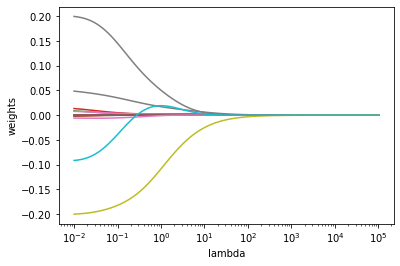

In [117]:
#Plot the Results
plot_ridge = plt.gca() 
     #gca() function iis used to get the current Axes instance on the current figure.
plot_ridge.plot(lambda_grid, models)
plot_ridge.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')

In [118]:
#K-fold Cross Validation to Choose the Best Model
ridgecv = RidgeCV(alphas = lambda_grid, cv = 10, normalize = True)
ridgecv.fit(X_train, logy_train)
ridgecv.alpha_

0.3593813663804626

### Model 5: Prediction on Test Dataset

In [119]:
#Best Model Coefs:
ridgecv.coef_

array([ 0.00000000e+00,  2.44969800e-04,  2.25500125e-03,  2.68051575e-03,
        2.40196812e-03,  1.30532082e-03,  2.45070850e-03,  2.44044898e-02,
        3.97405912e-05,  1.67531400e-04,  4.06762927e-05,  2.84434107e-04,
        1.52979304e-04,  1.00139910e-04,  1.82893579e-04,  2.37599483e-04,
       -3.02934864e-03,  8.69414858e-02, -1.50804430e-01,  7.30322486e-03])

In [120]:
ridgereg = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridgereg.fit(X_train, logy_train)
pred_ridge = ridgereg.predict(X_test)
pred_ridge = np.exp(pred_ridge)
pred_ridge

array([ 121.00922872,  667.41065721,  541.76291327,  288.37007888,
        225.86664053,  500.55296568,  690.76991746,  358.40377885,
        340.8255127 , 2623.38369133,  329.69033583,  724.31350797,
        337.30593836,  983.35243246, 1149.08455692,  199.60633495,
        223.60958398,  458.98095738,  164.44933056,  334.23156813,
        229.3771127 ,  320.56371026,  159.38985036,  297.5486165 ,
       1615.1854382 ,  328.82748163,  222.2503871 ,  699.43587903,
        291.8845272 ,  406.13954086,  362.11576469,  167.56122343,
        235.38513995,  180.25919805,  190.11339043,  285.51309123,
        618.3795597 ,  260.73750731,  174.33762343,  896.94014394,
        459.17799402,  413.97873638,  608.603344  ,  536.02729449,
        282.093914  ,  188.15662519,  136.28385909,  280.87246669,
        346.30377132,  849.19536912,  242.46891516, 1207.59237889,
        555.70738646])

In [121]:
#Absolute error
abs_err_ridge = abs(y_test - pred_ridge)

In [122]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_ridge.mean(),
                                             'Median of AbsErrors' : abs_err_ridge.median(),
                                             'SD of AbsErrors' :     abs_err_ridge.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_ridge),
                                             'Min of AbsErrors':     abs_err_ridge.min(),
                                             'Max of AbsErrors':     abs_err_ridge.max()}, index = ['Ridge Reg']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,226.190250,150.564121,290.948681,139.819852,8.156625,1873.383691


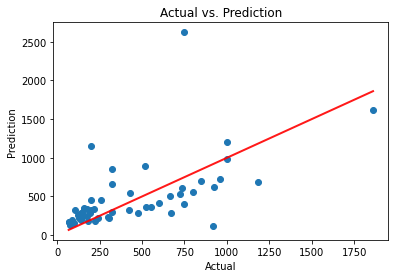

In [123]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_ridge)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

### Model 6: Lasso Regression

Lasso Regression:

The goal is to optimize:

   SSE + lambda * Sum(abs(beta_i))
   
   lambda => 0,  a tuning parameter

In [124]:
lambda_grid = 10 ** np.linspace(1, -3, 100)

In [125]:
from sklearn.linear_model import Lasso, LassoCV
lassoreg = Lasso(normalize = True)

models = pd.DataFrame(index = lambda_grid, columns = X_train.columns)
coefs = []
for i in lambda_grid:
    lassoreg.set_params(alpha = i)
    lassoreg.fit(X_train, logy_train)
    models.loc[i, :] = lassoreg.coef_
models.shape

(100, 20)

In [126]:
models.tail(10)

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0.002310,0,0,0.00490443,0.00222644,0,0,0.00334445,0.0324574,0,0.000377763,0,0.000287643,0,0,0.00012332,0,-0,0.0455022,-0.139122,0
0.002105,0,0,0.00495811,0.00244007,0,0,0.00337832,0.0338598,0,0.000368932,0,0.000290123,0,0,0.000129691,0,-0,0.0528672,-0.144479,0
0.001918,0,0,0.00500706,0.00263464,0,0,0.0034091,0.0351385,0,0.000360852,0,0.000292436,0,0,0.000135499,0,-0,0.0595789,-0.149358,0
0.001748,0,0,0.00505167,0.00281192,0,0,0.00343715,0.0363035,0,0.00035349,0,0.000294544,0,0,0.00014079,0,-0,0.0656944,-0.153805,0
0.001592,0,0,0.00509231,0.00297346,0,0,0.00346271,0.0373651,0,0.000346783,0,0.000296462,0,0,0.000145611,0,-0,0.0712666,-0.157856,0
0.001451,0,0,0.00512929,0.00312074,0,0,0.00348608,0.0383314,0,0.000340708,0,0.000298152,0,0,0.000150001,0,-0,0.0763426,-0.161549,0
0.001322,0,0,0.00516304,0.00325482,0,0,0.00350728,0.0392129,0,0.000335132,0,0.000299759,0,0,0.000154005,0,-0,0.080969,-0.164912,0
0.001205,0,0,0.00519379,0.00337701,0,0,0.0035266,0.040016,0,0.000330054,0,0.000301217,0,0,0.000157652,0,-0,0.0851843,-0.167977,0
0.001097,0,-0,0.00522181,0.00348835,0,0,0.00354422,0.0407477,0,0.000325431,0,0.000302539,0,0,0.000160975,0,-0,0.089025,-0.170769,0
0.001000,0,-0,0.00524733,0.00358981,0,0,0.00356028,0.0414143,0,0.000321222,0,0.00030374,0,-0,0.000164002,0,-0,0.0925244,-0.173314,0


Text(0, 0.5, 'weights')

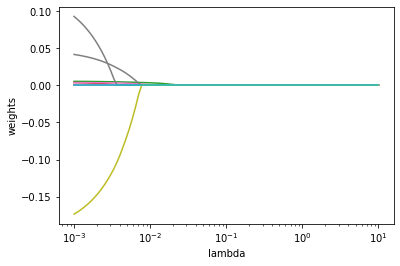

In [127]:
#Plot Results
plot_lasso = plt.gca() 
     #gca() function iis used to get the current Axes instance on the current figure.
plot_lasso.plot(lambda_grid, models)
plot_lasso.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')

In [128]:
#K-fold Cross Validation to Choose the Best Model
lassocv = LassoCV(alphas = lambda_grid, cv = 10, normalize = True)
lassocv.fit(X_train, logy_train)
lassocv.alpha_

0.0015922827933410905

### Model 6: Prediction on Test Dataset

In [129]:
#Best Model Coefs:
lassocv.coef_

array([ 0.00000000e+00,  0.00000000e+00,  5.09231011e-03,  2.97345715e-03,
        0.00000000e+00,  0.00000000e+00,  3.46270684e-03,  3.73650550e-02,
        0.00000000e+00,  3.46783440e-04,  0.00000000e+00,  2.96462231e-04,
        0.00000000e+00,  0.00000000e+00,  1.45610914e-04,  0.00000000e+00,
       -0.00000000e+00,  7.12666213e-02, -1.57856275e-01,  0.00000000e+00])

In [130]:
lassoreg = Lasso(alpha = lassocv.alpha_, normalize = True)
lassoreg.fit(X_train, logy_train)
pred_lasso = lassoreg.predict(X_test)
pred_lasso = np.exp(pred_lasso)
pred_lasso

array([ 109.27367308,  711.01942598,  646.48226592,  270.35952161,
        218.31263786,  499.47537169,  655.72242271,  367.53208123,
        321.1872239 , 2940.36921549,  319.42206132,  713.69851254,
        316.15462034, 1126.94112693, 1062.78762774,  193.90994809,
        228.66519303,  439.85810778,  161.58431219,  312.36195698,
        223.76631299,  306.10744424,  153.08217076,  295.14862202,
       1524.84625827,  336.10103752,  213.98779901,  772.45049645,
        287.60750597,  402.98113205,  332.14269812,  157.30075166,
        229.89963059,  171.38021257,  181.75638045,  264.30923357,
        626.16477101,  246.62113115,  167.30598514,  860.22363642,
        438.49355098,  393.35032763,  660.1778284 ,  579.53157169,
        278.1597316 ,  176.7790382 ,  133.84182662,  261.67196016,
        332.84561525,  845.32707271,  231.77752935, 1382.14787044,
        514.27697349])

In [131]:
#Absolute error
abs_err_lasso = abs(y_test - pred_lasso)

In [132]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_lasso.mean(),
                                             'Median of AbsErrors' : abs_err_lasso.median(),
                                             'SD of AbsErrors' :     abs_err_lasso.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_lasso),
                                             'Min of AbsErrors':     abs_err_lasso.min(),
                                             'Max of AbsErrors':     abs_err_lasso.max()}, index = ['Lasso Reg']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,226.190250,150.564121,290.948681,139.819852,8.156625,1873.383691
Lasso Reg,236.116696,142.607506,325.746875,159.141756,3.220962,2190.369215


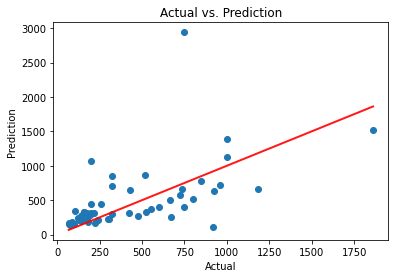

In [133]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_lasso)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

### Model 7: Decision Tree

In [134]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
reg_tree = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 5, ccp_alpha = 0.01)

In [136]:
tree_res = reg_tree.fit(X_train[['Years', 'Hits', 'League_N']], logy_train)

[Text(804.8076923076923, 951.3000000000001, 'Years <= 4.5\nmse = 0.788\nsamples = 210\nvalue = 5.98'),
 Text(429.2307692307692, 679.5, 'Hits <= 112.5\nmse = 0.516\nsamples = 66\nvalue = 5.131'),
 Text(214.6153846153846, 407.70000000000005, 'Years <= 3.5\nmse = 0.371\nsamples = 43\nvalue = 4.856'),
 Text(107.3076923076923, 135.89999999999998, 'mse = 0.352\nsamples = 32\nvalue = 4.702'),
 Text(321.9230769230769, 135.89999999999998, 'mse = 0.158\nsamples = 11\nvalue = 5.303'),
 Text(643.8461538461538, 407.70000000000005, 'Years <= 2.5\nmse = 0.381\nsamples = 23\nvalue = 5.645'),
 Text(536.5384615384615, 135.89999999999998, 'mse = 0.064\nsamples = 6\nvalue = 5.041'),
 Text(751.1538461538462, 135.89999999999998, 'mse = 0.318\nsamples = 17\nvalue = 5.859'),
 Text(1180.3846153846155, 679.5, 'Hits <= 117.5\nmse = 0.43\nsamples = 144\nvalue = 6.369'),
 Text(1073.076923076923, 407.70000000000005, 'Years <= 6.5\nmse = 0.319\nsamples = 72\nvalue = 6.002'),
 Text(965.7692307692307, 135.899999999999

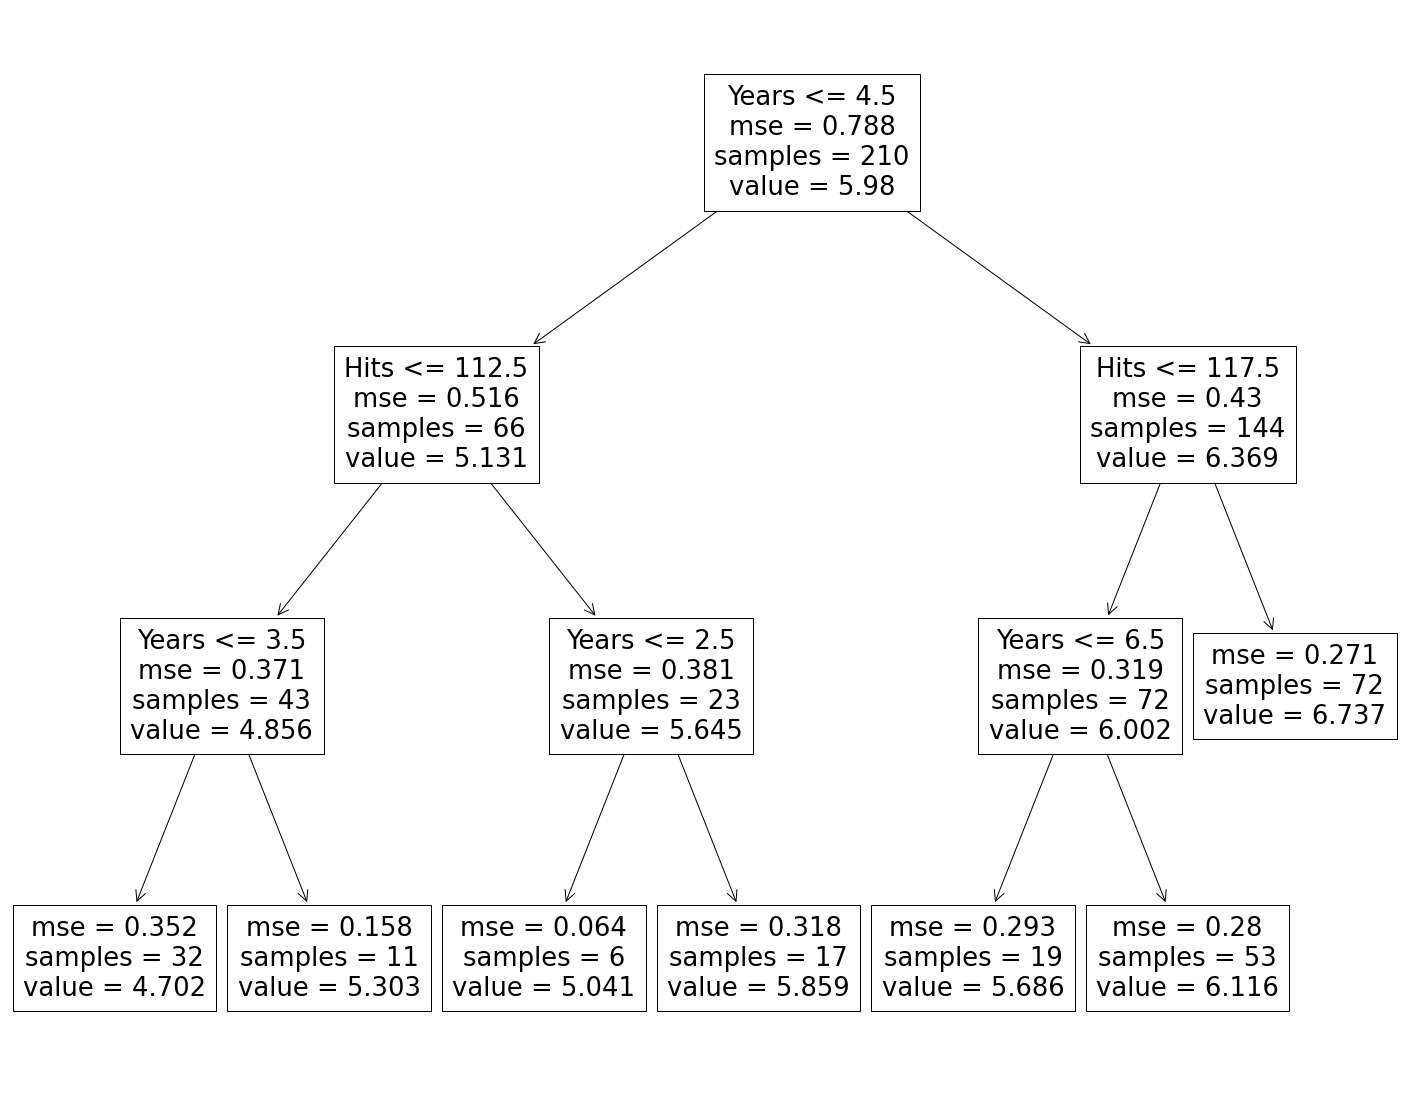

In [137]:
#Plot the Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_res, feature_names = ['Years', 'Hits', 'League_N'])

In [138]:
#To save the figure to the .png file:
fig.savefig('decistion_tree.png')

[Text(663.59375, 996.6, 'Years <= 4.5\nmse = 0.788\nsamples = 210\nvalue = 5.98'),
 Text(271.25, 815.4000000000001, 'Hits <= 112.5\nmse = 0.516\nsamples = 66\nvalue = 5.131'),
 Text(116.25, 634.2, 'Hits <= 33.5\nmse = 0.371\nsamples = 43\nvalue = 4.856'),
 Text(77.5, 453.0, 'mse = 1.459\nsamples = 2\nvalue = 6.455'),
 Text(155.0, 453.0, 'Years <= 3.5\nmse = 0.187\nsamples = 41\nvalue = 4.778'),
 Text(77.5, 271.79999999999995, 'Hits <= 69.5\nmse = 0.071\nsamples = 31\nvalue = 4.606'),
 Text(38.75, 90.59999999999991, 'mse = 0.041\nsamples = 14\nvalue = 4.438'),
 Text(116.25, 90.59999999999991, 'mse = 0.053\nsamples = 17\nvalue = 4.745'),
 Text(232.5, 271.79999999999995, 'Hits <= 71.5\nmse = 0.173\nsamples = 10\nvalue = 5.308'),
 Text(193.75, 90.59999999999991, 'mse = 0.021\nsamples = 4\nvalue = 5.604'),
 Text(271.25, 90.59999999999991, 'mse = 0.178\nsamples = 6\nvalue = 5.111'),
 Text(426.25, 634.2, 'Years <= 2.5\nmse = 0.381\nsamples = 23\nvalue = 5.645'),
 Text(387.5, 453.0, 'mse = 0.0

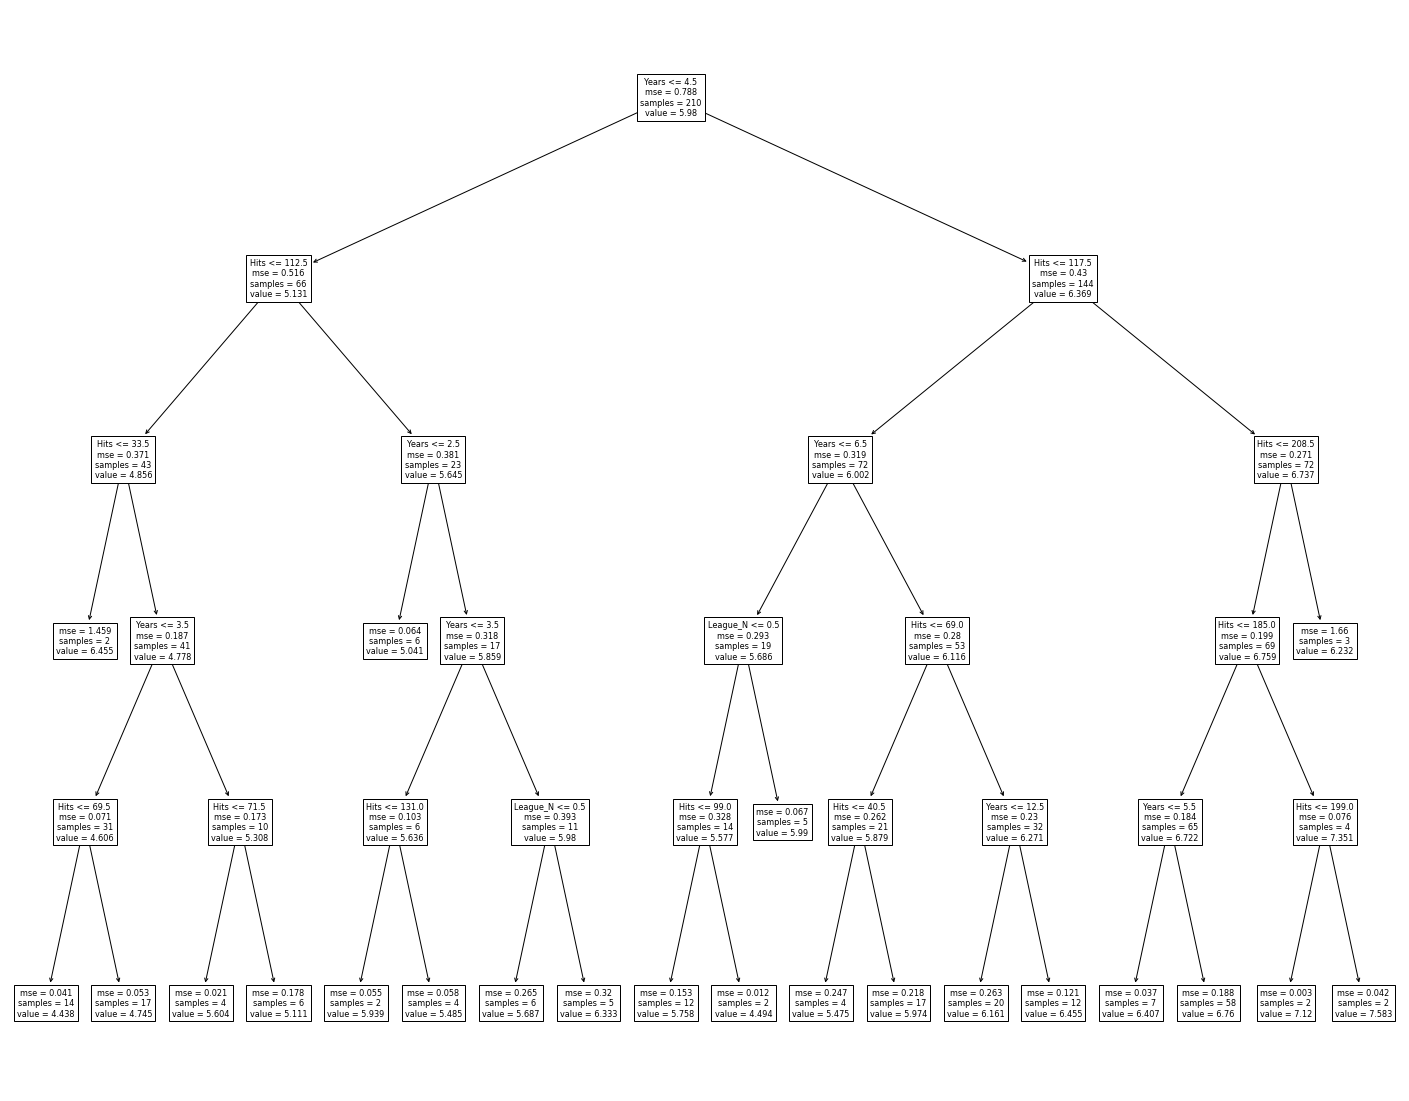

In [139]:
#Change Complexity of Tree Model
reg_tree = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 2, ccp_alpha = 0.001)
tree_res = reg_tree.fit(X_train[['Years', 'Hits', 'League_N']], logy_train)
#Plot the Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_res, feature_names = ['Years', 'Hits', 'League_N'])

[Text(620.5698529411765, 1009.5428571428572, 'CAtBat <= 1452.0\nmse = 0.788\nsamples = 210\nvalue = 5.98'),
 Text(287.2058823529412, 854.2285714285715, 'CHits <= 182.0\nmse = 0.344\nsamples = 75\nvalue = 5.083'),
 Text(123.08823529411765, 698.9142857142858, 'Runs <= 18.5\nmse = 0.294\nsamples = 42\nvalue = 4.74'),
 Text(82.05882352941177, 543.6, 'mse = 1.201\nsamples = 5\nvalue = 5.517'),
 Text(164.11764705882354, 543.6, 'CRuns <= 58.5\nmse = 0.079\nsamples = 37\nvalue = 4.635'),
 Text(82.05882352941177, 388.28571428571433, 'RBI <= 36.0\nmse = 0.033\nsamples = 20\nvalue = 4.462'),
 Text(41.029411764705884, 232.97142857142865, 'mse = 0.014\nsamples = 13\nvalue = 4.36'),
 Text(123.08823529411765, 232.97142857142865, 'mse = 0.013\nsamples = 7\nvalue = 4.653'),
 Text(246.1764705882353, 388.28571428571433, 'CRBI <= 72.5\nmse = 0.057\nsamples = 17\nvalue = 4.838'),
 Text(205.14705882352942, 232.97142857142865, 'Runs <= 45.0\nmse = 0.049\nsamples = 11\nvalue = 4.729'),
 Text(164.1176470588235

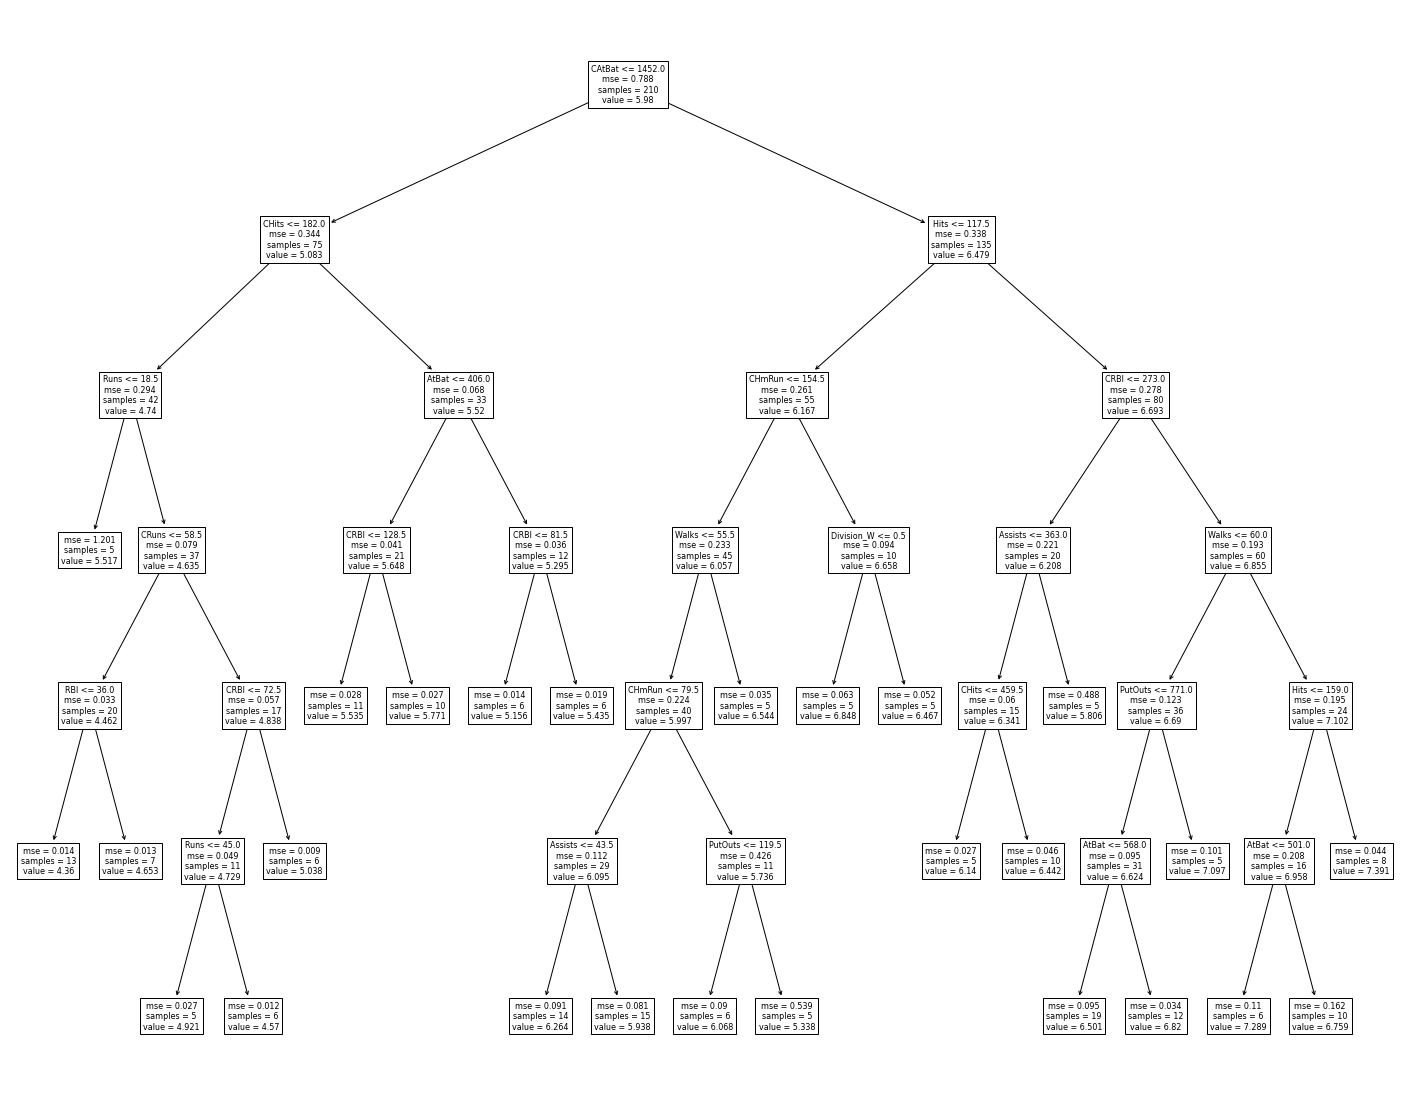

In [140]:
#Decision Tree Model Using All Variables
reg_tree = DecisionTreeRegressor(max_depth = 6, min_samples_leaf = 5, ccp_alpha = 0.001)
tree_res = reg_tree.fit(X_train.iloc[:, 1:], logy_train)
#Plot the Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_res, feature_names = X_train.iloc[:, 1:].columns)

In [141]:
#K-Fold Cross Validation for Choosing Hyper-parameters
#Create Hyper-parameters grid
max_depth = [5, 7, 10]
min_samples_leaf = [5, 10, 15]
ccp_alpha = [0.0001, 0.001, 0.01]
grid = list(itertools.product(max_depth, min_samples_leaf, ccp_alpha))
grid = pd.DataFrame(data = grid, index = range(1, 28), columns = ['max_depth', 'min_samples_leaf', 'ccp_alpha'])
grid

,max_depth,min_samples_leaf,ccp_alpha
1,5,5,0.0001
2,5,5,0.0010
3,5,5,0.0100
4,5,10,0.0001
5,5,10,0.0010
6,5,10,0.0100
7,5,15,0.0001
8,5,15,0.0010
9,5,15,0.0100
10,7,5,0.0001


In [142]:
k = 10
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 28))
cv_errors

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
for i in range(1, grid.shape[0] + 1):
    for j in range(1, k + 1):
        reg_tree = DecisionTreeRegressor(max_depth = grid.loc[i, 'max_depth'], 
                                         min_samples_leaf = grid.loc[i, 'min_samples_leaf'], 
                                         ccp_alpha = grid.loc[i, 'ccp_alpha'])
        tree_res = reg_tree.fit(X_train.iloc[folds != j, 1:], logy_train[folds != j])
        pred = tree_res.predict(X_train.iloc[folds == j, 1:])
        cv_errors.iloc[j - 1, i - 1] = ((logy_train[folds == j] - pred) ** 2).mean()

In [144]:
cv_errors

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,0.335223,0.335223,0.181079,0.299952,0.299952,0.182148,0.158411,0.158411,0.164338,0.419334,...,0.164338,0.362228,0.356467,0.181079,0.299952,0.299952,0.182148,0.158411,0.158411,0.164338
2,0.298057,0.294181,0.305339,0.281048,0.281048,0.28593,0.330993,0.330993,0.283661,0.288652,...,0.283661,0.287111,0.285045,0.305339,0.281048,0.281048,0.28593,0.330993,0.330993,0.283661
3,0.122635,0.122635,0.136976,0.17825,0.17825,0.10987,0.143654,0.143654,0.10987,0.104803,...,0.10987,0.104803,0.105254,0.136976,0.17825,0.17825,0.10987,0.143654,0.143654,0.10987
4,0.247319,0.247319,0.229247,0.16333,0.16333,0.169197,0.126156,0.126156,0.143583,0.276988,...,0.143583,0.284502,0.288927,0.229247,0.16333,0.16333,0.169197,0.126156,0.126156,0.143583
5,0.172959,0.17364,0.200546,0.199693,0.199693,0.194091,0.165419,0.165419,0.164937,0.23026,...,0.164937,0.218217,0.223426,0.200546,0.199693,0.199693,0.194091,0.165419,0.165419,0.164937
6,0.319979,0.308821,0.258687,0.289077,0.289225,0.27032,0.250822,0.250822,0.27032,0.245192,...,0.27032,0.245192,0.215114,0.258687,0.255173,0.255321,0.27032,0.250822,0.250822,0.27032
7,0.195575,0.198009,0.226792,0.200487,0.200487,0.207741,0.196022,0.196022,0.215922,0.207792,...,0.215922,0.209272,0.206427,0.226792,0.200487,0.200487,0.207741,0.196022,0.196022,0.215922
8,0.508114,0.516703,0.585114,0.680707,0.680707,0.61903,0.676007,0.676007,0.61903,0.577649,...,0.61903,0.634257,0.644127,0.585114,0.680707,0.680707,0.61903,0.676007,0.676007,0.61903
9,0.387065,0.390653,0.322674,0.331198,0.331198,0.28256,0.309651,0.309651,0.295698,0.383805,...,0.295698,0.382548,0.385321,0.322674,0.321079,0.321079,0.28256,0.309651,0.309651,0.295698
10,0.329599,0.332212,0.262268,0.324828,0.324928,0.265396,0.255496,0.255496,0.267829,0.423548,...,0.267829,0.423548,0.420461,0.262268,0.324828,0.324928,0.265396,0.255496,0.255496,0.267829


In [145]:
cv_errors.mean(axis = 0)

1     0.291652
2     0.291939
3     0.270872
4     0.294857
5     0.294882
6     0.258628
7     0.261263
8     0.261263
9     0.253519
10    0.315802
11    0.307737
12    0.270872
13    0.290455
14    0.290480
15    0.258628
16    0.261263
17    0.261263
18    0.253519
19    0.315168
20    0.313057
21    0.270872
22    0.290455
23    0.290480
24    0.258628
25    0.261263
26    0.261263
27    0.253519
dtype: float64

In [146]:
cv_errors.mean(axis = 0).argmin() + 1

27

In [147]:
#Best Model
grid.loc[cv_errors.mean(axis = 0).argmin() + 1,:]

max_depth           10.00
min_samples_leaf    15.00
ccp_alpha            0.01
Name: 27, dtype: float64

### Model 7: Prediction on Test Dataset

[Text(523.125, 978.48, 'CAtBat <= 1452.0\nmse = 0.788\nsamples = 210\nvalue = 5.98'),
 Text(232.5, 761.0400000000001, 'CHits <= 182.0\nmse = 0.344\nsamples = 75\nvalue = 5.083'),
 Text(116.25, 543.6, 'mse = 0.294\nsamples = 42\nvalue = 4.74'),
 Text(348.75, 543.6, 'mse = 0.068\nsamples = 33\nvalue = 5.52'),
 Text(813.75, 761.0400000000001, 'Hits <= 117.5\nmse = 0.338\nsamples = 135\nvalue = 6.479'),
 Text(581.25, 543.6, 'Walks <= 43.5\nmse = 0.261\nsamples = 55\nvalue = 6.167'),
 Text(465.0, 326.1600000000001, 'mse = 0.251\nsamples = 38\nvalue = 6.023'),
 Text(697.5, 326.1600000000001, 'mse = 0.136\nsamples = 17\nvalue = 6.487'),
 Text(1046.25, 543.6, 'CRBI <= 273.0\nmse = 0.278\nsamples = 80\nvalue = 6.693'),
 Text(930.0, 326.1600000000001, 'mse = 0.221\nsamples = 20\nvalue = 6.208'),
 Text(1162.5, 326.1600000000001, 'Walks <= 60.0\nmse = 0.193\nsamples = 60\nvalue = 6.855'),
 Text(1046.25, 108.72000000000003, 'mse = 0.123\nsamples = 36\nvalue = 6.69'),
 Text(1278.75, 108.720000000000

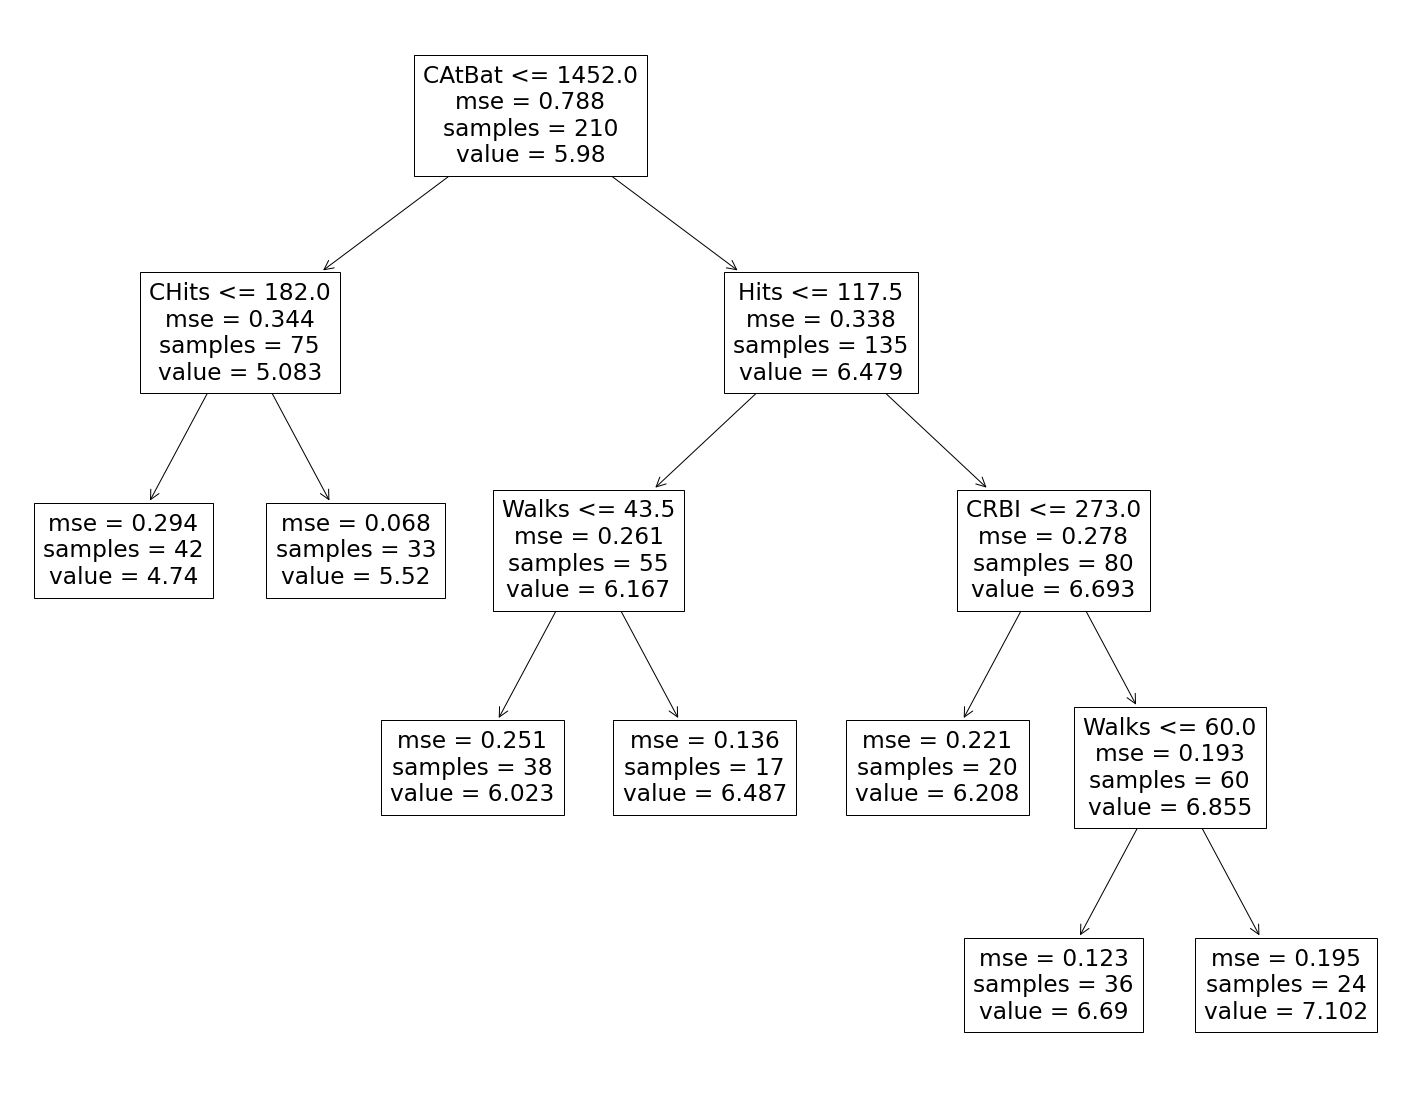

In [148]:
#The Best Decision Tree Model Using All Variables
reg_tree = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 15, ccp_alpha = 0.01)
tree_res = reg_tree.fit(X_train.iloc[:, 1:], logy_train)
#Plot the Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_res, feature_names = X_train.iloc[:, 1:].columns)

In [149]:
pred_tree = tree_res.predict(X_test.iloc[:, 1:])
pred_tree = np.exp(pred_tree)
pred_tree

array([ 114.45065654,  412.99705229,  412.99705229,  114.45065654,
        114.45065654,  804.28674482, 1214.95423456,  249.51767434,
        249.51767434,  412.99705229,  249.51767434, 1214.95423456,
        249.51767434,  804.28674482,  412.99705229,  114.45065654,
        249.51767434,  249.51767434,  114.45065654,  114.45065654,
        249.51767434,  656.31727516,  114.45065654,  412.99705229,
       1214.95423456,  249.51767434,  412.99705229,  412.99705229,
        114.45065654,  412.99705229,  412.99705229,  114.45065654,
        249.51767434,  249.51767434,  114.45065654,  249.51767434,
       1214.95423456,  114.45065654,  114.45065654,  804.28674482,
        412.99705229,  656.31727516,  804.28674482, 1214.95423456,
        249.51767434,  114.45065654,  114.45065654,  412.99705229,
        249.51767434,  412.99705229,  249.51767434, 1214.95423456,
        412.99705229])

In [150]:
#Absolute error
abs_err_tree = abs(y_test - pred_tree)

In [151]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_tree.mean(),
                                             'Median of AbsErrors' : abs_err_tree.median(),
                                             'SD of AbsErrors' :     abs_err_tree.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_tree),
                                             'Min of AbsErrors':     abs_err_tree.min(),
                                             'Max of AbsErrors':     abs_err_tree.max()}, index = ['Decision Tree Reg']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,226.190250,150.564121,290.948681,139.819852,8.156625,1873.383691
Lasso Reg,236.116696,142.607506,325.746875,159.141756,3.220962,2190.369215
Decision Tree Reg,156.155031,89.517674,165.411536,178.531669,5.549343,805.549343


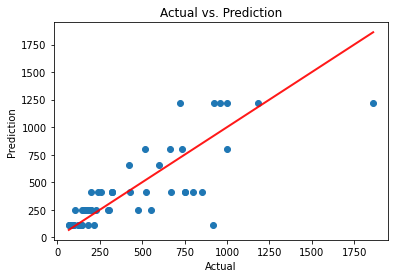

In [152]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_tree)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

### Model 8: Bagging

### Model 8: Prediction on Test Dataset

In [153]:
from sklearn.ensemble import RandomForestRegressor
#Bagging: Using All Features
bagging_reg = RandomForestRegressor(max_features = 19, random_state = 123, n_estimators = 500)
bagging_res = bagging_reg.fit(X_train.iloc[:, 1:], logy_train)
pred_bagging = bagging_res.predict(X_test.iloc[:, 1:])
pred_bagging = np.exp(pred_bagging)
pred_bagging

array([ 742.15541124,  478.00258477,  435.39290395,  119.22547594,
         94.1831841 ,  725.95784322, 1104.24816711,  312.45909688,
        174.8343337 ,  599.65023254,  215.59521662, 1084.06144863,
        209.1858448 ,  696.43624269,  713.74913745,  149.96817758,
        257.62312456,  199.96461261,   86.14182284,  169.64850083,
        240.30092607,  451.70656512,   97.20705531,  553.690049  ,
       1159.30151902,  194.8884497 ,  384.7656276 ,  663.41773678,
        159.73461247,  453.04003484,  477.75611517,  116.91032922,
        260.70439847,  233.76383492,   88.83556099,  235.65117038,
        789.12268349,  106.53206762,  104.29714913,  733.4090057 ,
        518.31127727,  638.99081304,  733.0070859 ,  668.52075814,
        262.32315547,  151.91266848,  127.50434186,  450.24460591,
        239.98157161,  514.60127756,  173.42403883,  898.66142411,
        728.42836371])

In [154]:
#Absolute error
abs_err_bagging = abs(y_test - pred_bagging)

In [155]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_bagging.mean(),
                                             'Median of AbsErrors' : abs_err_bagging.median(),
                                             'SD of AbsErrors' :     abs_err_bagging.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_bagging),
                                             'Min of AbsErrors':     abs_err_bagging.min(),
                                             'Max of AbsErrors':     abs_err_bagging.max()}, index = ['Bagging Reg']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,226.190250,150.564121,290.948681,139.819852,8.156625,1873.383691
Lasso Reg,236.116696,142.607506,325.746875,159.141756,3.220962,2190.369215
Decision Tree Reg,156.155031,89.517674,165.411536,178.531669,5.549343,805.549343
Bagging Reg,109.402962,56.479242,132.622868,132.228061,0.035387,702.158481


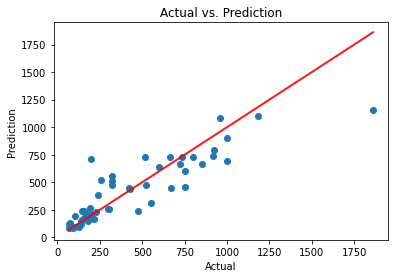

In [156]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_bagging)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

### Model 9: Random Forrest 

In [157]:
from sklearn.ensemble import RandomForestRegressor
#Random Forrest: Using 6 Features
rf_reg = RandomForestRegressor(max_features = 6, random_state = 123, n_estimators = 500)
rf_res = rf_reg.fit(X_train.iloc[:, 1:], logy_train)

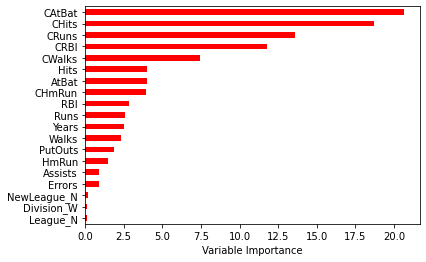

In [158]:
Importance = pd.DataFrame({'Importance':rf_res.feature_importances_ * 100}, 
                          index = X_train.iloc[:, 1:].columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

#### Model 9: Prediction on Test Dataset

In [159]:
pred_rf = rf_res.predict(X_test.iloc[:, 1:])
pred_rf = np.exp(pred_rf)
pred_rf

array([ 717.61023751,  511.32434906,  447.20099048,  118.28017568,
         98.41766757,  722.29486455, 1027.894634  ,  354.08528825,
        174.21030841,  565.34451497,  220.71780939,  973.83452126,
        242.77666559,  740.54827689,  714.1795295 ,  152.76163036,
        260.54644712,  197.1140701 ,   88.89318971,  185.17592202,
        213.48598741,  444.41815879,   98.61197511,  544.98385069,
       1133.26487424,  203.50685917,  364.69740597,  653.38627297,
        172.29290261,  490.61657733,  471.19279899,  123.9057    ,
        280.74709753,  236.4442194 ,   88.20196826,  259.38383957,
        715.34182755,  105.44607975,  101.51495576,  754.14815771,
        535.11337303,  619.99809222,  705.34428903,  697.02699792,
        263.92297986,  153.50169571,  134.34598087,  440.75627976,
        258.63488943,  535.03238932,  171.95783057,  917.87095065,
        661.35683276])

In [160]:
#Absolute error
abs_err_rf = abs(y_test - pred_rf)

In [161]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_rf.mean(),
                                             'Median of AbsErrors' : abs_err_rf.median(),
                                             'SD of AbsErrors' :     abs_err_rf.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_rf),
                                             'Min of AbsErrors':     abs_err_rf.min(),
                                             'Max of AbsErrors':     abs_err_rf.max()}, index = ['Random Forrest Reg']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,226.190250,150.564121,290.948681,139.819852,8.156625,1873.383691
Lasso Reg,236.116696,142.607506,325.746875,159.141756,3.220962,2190.369215
Decision Tree Reg,156.155031,89.517674,165.411536,178.531669,5.549343,805.549343
Bagging Reg,109.402962,56.479242,132.622868,132.228061,0.035387,702.158481
Random Forrest Reg,111.835176,59.345981,134.943981,175.196902,1.388025,728.195126


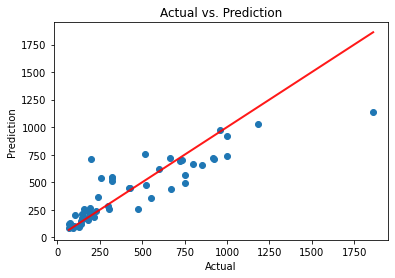

In [162]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_rf)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

### Model 10: GB Regression

In [163]:
from sklearn.ensemble import GradientBoostingRegressor

In [164]:
#Sample Boosted Model (Not Tuned)
boosting_reg = GradientBoostingRegressor(learning_rate = 0.1,  #learning rate
                                         n_estimators = 1000,  #the total number of trees to fit
                                         subsample = 1.0,      #the fraction of samples to be used,  
                                                                    #if .< 1, Stochastic GB
                                         max_depth = 4,        #the maximum depth of each tree
                                         min_samples_leaf = 5, #the minimum number of observations in the leaf nodes of the trees
                                         random_state = 1234)

boosting_res = boosting_reg.fit(X_train.iloc[:, 1:], logy_train)

In [165]:
#K-Fold Cross Validation for Choosing Hyper-parameters
#Create Hyper-parameters grid
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 0.9]
max_depth = [1, 3, 5]
grid = list(itertools.product(learning_rate, subsample, max_depth))
grid = pd.DataFrame(data = grid, index = range(1, 28), columns = ['learning_rate', 'subsample', 'max_depth'])
grid

,learning_rate,subsample,max_depth
1,0.001,0.5,1
2,0.001,0.5,3
3,0.001,0.5,5
4,0.001,0.7,1
5,0.001,0.7,3
6,0.001,0.7,5
7,0.001,0.9,1
8,0.001,0.9,3
9,0.001,0.9,5
10,0.010,0.5,1


In [166]:
k = 10
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 28))
cv_errors

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
for i in range(1, grid.shape[0] + 1):
    for j in range(1, k + 1):
        boosting_reg = GradientBoostingRegressor(learning_rate = grid.loc[i, 'learning_rate'], 
                                                 subsample = grid.loc[i, 'subsample'], 
                                                 max_depth = grid.loc[i, 'max_depth'],
                                                 random_state = 1234)
        boosting_res = boosting_reg.fit(X_train.iloc[folds != j, 1:], logy_train[folds != j])
        pred = boosting_res.predict(X_train.iloc[folds == j, 1:])
        cv_errors.iloc[j - 1, i - 1] = ((logy_train[folds == j] - pred) ** 2).mean()

In [168]:
cv_errors

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,0.395272,0.38136,0.382051,0.39511,0.380774,0.38426,0.394955,0.387965,0.390368,0.174714,...,0.162993,0.131971,0.144494,0.136309,0.132245,0.126422,0.167415,0.134837,0.129922,0.137859
2,0.882862,0.849619,0.845669,0.882594,0.849627,0.843604,0.882077,0.852217,0.847012,0.490632,...,0.362438,0.273126,0.26379,0.265448,0.250953,0.292415,0.266611,0.28947,0.267663,0.263177
3,0.60938,0.586449,0.580795,0.610447,0.585993,0.581486,0.607726,0.586829,0.581582,0.27867,...,0.163285,0.102829,0.118867,0.124814,0.0998059,0.132059,0.143187,0.0939594,0.116601,0.140368
4,0.67582,0.65749,0.651365,0.675562,0.659663,0.651605,0.67484,0.659896,0.648975,0.372873,...,0.246613,0.156393,0.142174,0.141174,0.144093,0.137148,0.150905,0.146484,0.132432,0.127336
5,0.646553,0.634365,0.634422,0.646708,0.632922,0.639975,0.646729,0.633301,0.649237,0.327678,...,0.378016,0.350539,0.231791,0.207088,0.279714,0.401688,0.25303,0.257711,0.263772,0.266478
6,0.960675,0.92233,0.911969,0.960733,0.925706,0.913403,0.960294,0.931147,0.919139,0.503872,...,0.338313,0.215514,0.242695,0.225379,0.1694,0.195477,0.171129,0.149025,0.178961,0.198329
7,0.598925,0.588854,0.582918,0.597491,0.588004,0.585746,0.600075,0.584298,0.580778,0.321988,...,0.264243,0.269238,0.209695,0.206843,0.229661,0.180567,0.238911,0.203723,0.173525,0.166402
8,1.08575,1.06113,1.06236,1.08699,1.05971,1.06179,1.08732,1.05914,1.06091,0.661378,...,0.598034,0.507436,0.515529,0.477941,0.529313,0.506456,0.517473,0.528155,0.498873,0.511823
9,0.579635,0.575306,0.57355,0.580505,0.57566,0.575165,0.580272,0.573433,0.576378,0.30131,...,0.300231,0.301711,0.280224,0.333566,0.292451,0.315113,0.303049,0.257731,0.281405,0.274616
10,0.624937,0.602194,0.598306,0.62517,0.601768,0.599979,0.6244,0.602103,0.599189,0.312462,...,0.273044,0.266173,0.302547,0.301,0.268158,0.319814,0.330401,0.272177,0.326338,0.315853


In [169]:
cv_errors.mean(axis = 0)

1     0.705981
2     0.685909
3     0.682341
4     0.706131
5     0.685983
6     0.683702
7     0.705868
8     0.687033
9     0.685356
10    0.374558
11    0.301670
12    0.293817
13    0.374038
14    0.303058
15    0.297953
16    0.376195
17    0.303787
18    0.308721
19    0.257493
20    0.245181
21    0.241956
22    0.239579
23    0.260716
24    0.254211
25    0.233327
26    0.236949
27    0.240224
dtype: float64

In [170]:
cv_errors.mean(axis = 0).argmin() + 1

25

In [171]:
grid.iloc[cv_errors.mean(axis = 0).argmin() + 1, :]

learning_rate    0.1
subsample        0.9
max_depth        3.0
Name: 26, dtype: float64

#### Model 10: Prediction on Test Dataset

In [172]:
boosting_reg = GradientBoostingRegressor(learning_rate = 0.1,  #learning rate
                                         n_estimators = 1000,  #the total number of trees to fit
                                         subsample = 0.9,      #the fraction of samples to be used,  
                                                                    #if .< 1, Stochastic GB
                                         max_depth = 3,        #the maximum depth of each tree
                                         min_samples_leaf = 5, #the minimum number of observations in the leaf nodes of the trees
                                         random_state = 1234)

boosting_res = boosting_reg.fit(X_train.iloc[:, 1:], logy_train)

In [173]:
pred_boosting = boosting_res.predict(X_test.iloc[:, 1:])
pred_boosting = np.exp(pred_boosting)
pred_boosting

array([ 294.42589232,  338.80751655,  339.4425359 ,  127.92238733,
        168.76121252,  903.45165525, 1365.98896611,  363.63291659,
        195.72596303, 1038.39779885,  244.20633983,  973.10190214,
        186.17757481,  656.46499407,  679.8800138 ,  145.8999224 ,
        239.64062911,  181.87034928,  162.46278258,  206.81911293,
        239.49162032,  451.32245723,  204.42450287,  568.08513058,
       1274.87145626,  169.38778036,  384.9152073 ,  661.869545  ,
        201.8731138 ,  802.33329629,  464.35680623,  187.02125907,
        255.16529677,  354.43828184,   84.41126526,  234.14035665,
        559.21407243,  111.01082457,  132.97873506,  559.97329685,
        451.40548358,  785.48718796,  524.66112406,  754.63543805,
        238.97698841,  136.36861229,  275.91236392,  487.39348089,
        248.8848421 ,  408.63081886,  181.08035753, 1017.41501033,
        774.89453069])

In [174]:
#Absolute error
abs_err_boosting = abs(y_test - pred_boosting)

In [175]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_boosting.mean(),
                                             'Median of AbsErrors' : abs_err_boosting.median(),
                                             'SD of AbsErrors' :     abs_err_boosting.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_boosting),
                                             'Min of AbsErrors':     abs_err_boosting.min(),
                                             'Max of AbsErrors':     abs_err_boosting.max()}, index = ['GB Reg']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,226.190250,150.564121,290.948681,139.819852,8.156625,1873.383691
Lasso Reg,236.116696,142.607506,325.746875,159.141756,3.220962,2190.369215
Decision Tree Reg,156.155031,89.517674,165.411536,178.531669,5.549343,805.549343
Bagging Reg,109.402962,56.479242,132.622868,132.228061,0.035387,702.158481
Random Forrest Reg,111.835176,59.345981,134.943981,175.196902,1.388025,728.195126
GB Reg,127.508352,65.359371,142.103905,156.731645,5.588735,625.574108


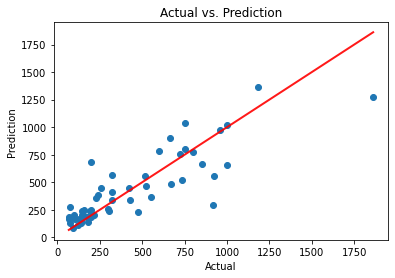

In [176]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_boosting)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

### Model 11: XGBoost Regression

In [177]:
from xgboost import XGBRegressor

In [178]:
xgb_reg = XGBRegressor(n_estimators = 1000,
                       max_depth = 4,               #the maximum depth of each tree
                       learning_rate = 0.01,        #learning rate      
                       subsample = 0.9,             #the fraction of samples to be used when constructing each tree
                       colsample_bytree = 0.3,      #subsample ratio of columns when constructing each tree
                       reg_alpha = 0.1,             #L1 (Lasso) regularization term
                       reg_lambda = 0.1,            #L2 (Ridge) regularization term
                       n_jobs = -1,                 #-1 means using all processors.
                       random_state = 1234)

xgb_res = xgb_reg.fit(X_train.iloc[:, 1:], logy_train)

In [179]:
pred_xgb = xgb_res.predict(X_test.iloc[:, 1:])
pred_xgb = np.exp(pred_xgb)
pred_xgb

array([1450.9032  ,  490.43628 ,  410.96497 ,  111.27633 ,  111.55567 ,
        744.27637 , 1158.9738  ,  375.76688 ,  180.79286 ,  560.07416 ,
        240.21744 ,  992.95447 ,  257.70255 ,  715.6544  ,  654.79083 ,
        139.73607 ,  284.8663  ,  228.21547 ,   80.86181 ,  202.94371 ,
        201.7473  ,  436.0658  ,   93.516815,  537.13586 , 1321.4675  ,
        224.42206 ,  351.4241  ,  635.9792  ,  186.29805 ,  590.73706 ,
        493.06155 ,  128.46281 ,  294.18613 ,  264.77295 ,   87.42125 ,
        294.35437 ,  570.72455 ,  101.746475,   89.187065,  557.864   ,
        465.9013  ,  725.0902  ,  624.03406 ,  680.63715 ,  285.0806  ,
        137.48572 ,  116.081055,  472.92462 ,  246.34981 ,  422.25302 ,
        169.45775 , 1057.0066  ,  797.46124 ], dtype=float32)

In [180]:
#Absolute error
abs_err_xgb = abs(y_test - pred_xgb)

In [181]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_xgb.mean(),
                                             'Median of AbsErrors' : abs_err_xgb.median(),
                                             'SD of AbsErrors' :     abs_err_xgb.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_xgb),
                                             'Min of AbsErrors':     abs_err_xgb.min(),
                                             'Max of AbsErrors':     abs_err_xgb.max()}, index = ['XGB Reg']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,226.190250,150.564121,290.948681,139.819852,8.156625,1873.383691
Lasso Reg,236.116696,142.607506,325.746875,159.141756,3.220962,2190.369215
Decision Tree Reg,156.155031,89.517674,165.411536,178.531669,5.549343,805.549343
Bagging Reg,109.402962,56.479242,132.622868,132.228061,0.035387,702.158481
Random Forrest Reg,111.835176,59.345981,134.943981,175.196902,1.388025,728.195126
GB Reg,127.508352,65.359371,142.103905,156.731645,5.588735,625.574108


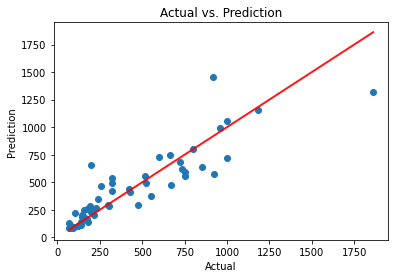

In [182]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_xgb)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

# End of the Code

Assignment:

Tune hyper-parameters in XGBoost model using k-fold cross validation.
